# ****Latar Belakang****
Transportasi publik memainkan peranan yang cukup krusial dalam memberikan dukungan terhadap mobilitas masyarakat urban, khususnya pada kota metropolitan layaknya Jakarta. Salah satu dari sekian banyak transportasi umum yang digunakan oleh publik adalah Transjakarta. Penggunaan transportasi umum ini merupakan sebuah solusi dari kebutuhan publik yang memerlukan transportasi terjangkau, cepat, mengurai kemacetan, dapat mengurangi polusi udara, dan terintegrasi. Seiring dengan meningkatnya jumlah pengguna, penting bagi pengelola untuk memahami pola penggunaan, efisiensi operasional, dan pengalaman pelanggan secara *data-driven*.


Sebagai sebuah bagian dari badan usaha daerah, Transjakarta memiliki persaingan yang ketat dalam industri transportasi. Hal ini pun membuat Transjakarta mengambil keputusan untuk mengolah data perjalanan penggunanya dalam menggunakan layanan Transjakarta guna meningkatkan layanan dan pendapatannya. Sejumlah aspek fundamental yang ditekankan dalam sebuah badan usaha adalah mengonstruksikan sebuah strategi pemasaran menggunakan data.

# ****Pernyataan Masalah****

Terdapat beberapa faktor yang dapat meningkatkan jumlah pengguna moda transportasi Transjakarta dengan menggunakan **promosi dan peningkatan kualitas layanan**. Sebagai seorang *data scientist*, Saya melakukan survey terhadap data dan menemukan berbagai macam temuan, yaitu;
1. Data mengenai nama pengguna dan sumber transaksi.
2. Data mengenai pemberhentian awal.
3. Missing values memiliki interkonektivitas.
4. Data yang diperoleh berasal dari Hari Senin tanggal 3 hingga Hari Minggu 30 April 2023. Berarti, data yang diperoleh sebesar 28 hari dengan 37.900 transaksi.

Berdasarkan informasi tersebut dengan tujuan promosi dan peningkatan layanan, Saya akan **mengambil beberapa data**; 
1. Sumber dana yang digunakan untuk transaksi beserta umur dan jenis kelaminnya.
2. Frekuensi pengguna dalam menggunakan moda transportasi Transjakarta.
3. Rute populer dan jam sibuk.

Menggunakan 3 pokok data tersebut, **terdapat beberapa output yang menjadi bahan pertimbangan bagi *decision maker***;
1. Menjalin para penyalur sumber dana untuk memberikan promosi kepada pengguna penyalur dana terkait atau kepada pengguna loyal.
2. Mengetahui lokasi kepadatan pengguna Transjakarta. Keputusan yang diambil oleh *decision maker* dapat berupa memberikan promosi pada halte sepi pengguna ataupun menambah armada.

# ****Data****
Untuk menjawab pertanyaan yang telah diajukan, saya akan menganalisis data pengguna **Transjakarta**. Anda juga dapat mengakses dataset tersebut melalui tautan [di sini](https://drive.google.com/file/d/1IAz2JNxvDWxEPTNzu2Wo_blxnDHdqLOS/view?usp=drive_link). 

In [300]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  
import statsmodels.api as sm
from scipy.stats import kstest
from statsmodels.stats.diagnostic import lilliefors 
from scipy.stats import shapiro, normaltest, chi2_contingency, mannwhitneyu, ttest_ind, spearmanr
from statsmodels.stats.proportion import proportions_ztest
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# ****Deskripsi Dataset****

Dataset ini memuat informasi detail mengenai aktivitas pengguna Transjakarta selama periode 3 April 2023 hingga 30 April 2023. Terdiri dari 22 kolom dan 37.900 baris, setiap baris merepresentasikan satu transaksi perjalanan pengguna.

Berikut penjelasan masing-masing kolom dalam dataset:

1. `transID`: ID unik untuk setiap transaksi.
2. `payCardID`: ID kartu pembayaran, berfungsi sebagai identifikasi pelanggan.
3. `payCardBank`: Nama bank penerbit kartu.
4. `payCardName`: Nama pemilik kartu.
5. `payCardSex`: Jenis kelamin pemilik kartu.
6. `payCardBirthDate`: Tahun lahir pemilik kartu.
7. `corridorID`: ID koridor/rute Transjakarta.
8. `corridorName`: Nama koridor/rute, berisi informasi titik awal dan akhir.
9. `direction`: Arah perjalanan; 0 untuk *Pergi*, 1 untuk *Kembali*.
10. `tapInStops`: ID halte tempat pengguna melakukan *tap in*.
11. `tapInStopsName`: Nama halte tempat *tap in* dilakukan.
12. `tapInStopsLat`: Koordinat lintang halte *tap in*.
13. `tapInStopsLon`: Koordinat bujur halte *tap in*.
14. `stopStartSeq`: Urutan halte awal dalam rute berdasarkan arah perjalanan.
15. `tapInTime`: Waktu pengguna melakukan *tap in*.
16. `tapOutStops`: ID halte tempat pengguna melakukan *tap out*.
17. `tapOutStopsName`: Nama halte tempat *tap out* dilakukan.
18. `tapOutStopsLat`: Koordinat lintang halte *tap out*.
19. `tapOutStopsLon`: Koordinat bujur halte *tap out*.
20. `stopEndSeq`: Urutan halte akhir dalam rute berdasarkan arah perjalanan.
21. `tapOutTime`: Waktu pengguna melakukan *tap out*.
22. `payAmount`: Jumlah pembayaran untuk perjalanan. Beberapa transaksi bernilai nol (gratis).

Berikut adalah tampilan lima data teratas dari `Transjakarta.csv`:


In [301]:
df = pd.read_csv('Transjakarta.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


# ****Data Understanding and Cleaning****

Sebelum masuk ke tahap analisis, penting untuk terlebih dahulu memahami struktur dan isi data melalui proses *data understanding*. Tahapan ini bertujuan untuk mengidentifikasi potensi anomali, seperti nilai yang tidak wajar atau data yang hilang, yang nantinya akan ditangani dalam proses *data cleaning*. Setiap anomali yang ditemukan akan disertai dengan penjelasan serta alasan mengapa langkah pembersihan data tersebut diambil. Proses ini juga akan mempertimbangkan pengetahuan kontekstual (*domain knowledge*) dan prinsip-prinsip statistik.

Sebagai langkah awal, mari kita tinjau data terkait informasi usia pengguna Transjakarta.


In [302]:
print(f'Jumlah baris dan kolom di dataset Transjakarta {df.shape}')
df.info()

Jumlah baris dan kolom di dataset Transjakarta (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-

In [303]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,FMZZ963S4B68ZP,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [304]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

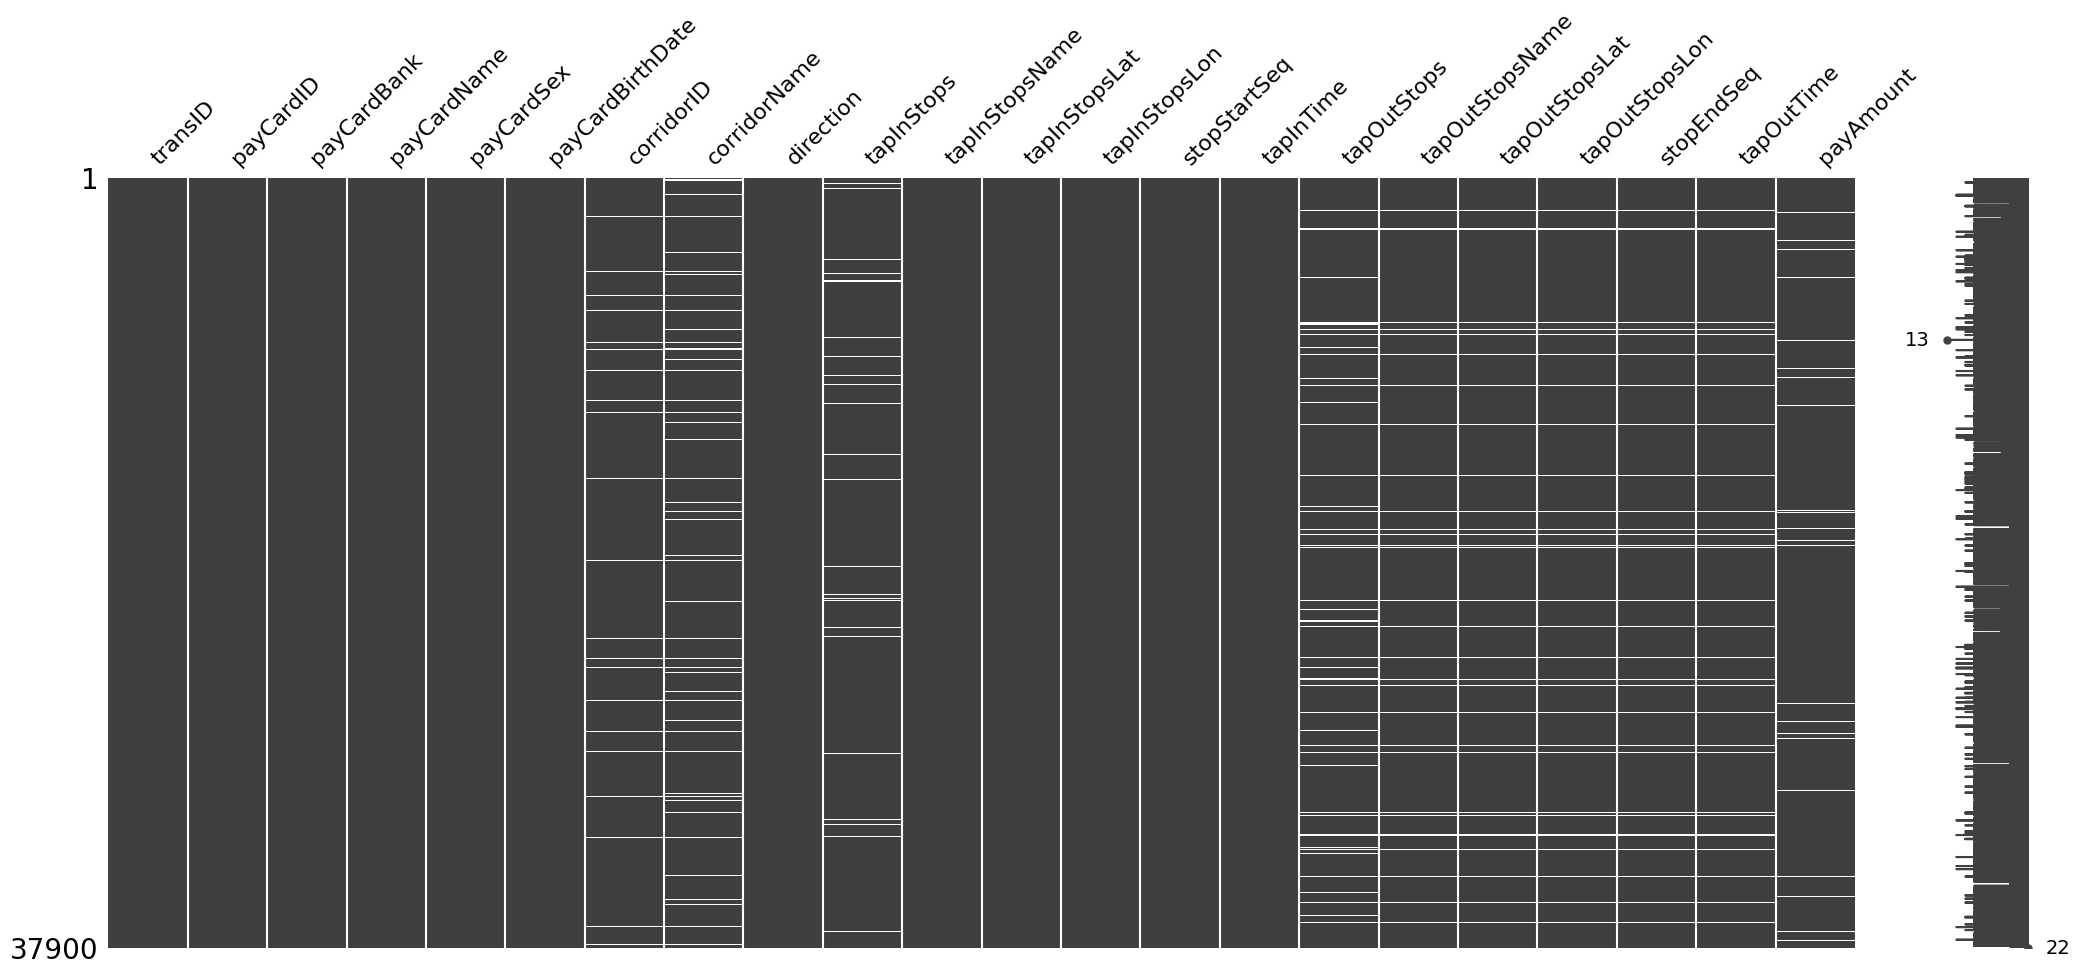

In [305]:
df.duplicated().sum()
msno.matrix(df)
df.isna().sum()

## **Intisari dan Keputusan dari Tahap Data Understanding**

Berdasarkan eksplorasi awal terhadap dataset, diperoleh beberapa poin penting yang menjadi dasar pengambilan keputusan pada tahap pembersihan dan pengolahan data, yaitu:

1. Dataset terdiri dari **22 kolom** dan **37.900 baris**, yang mencerminkan transaksi pengguna Transjakarta selama periode tertentu dengan 0 data duplikat.

2. Ditemukan **missing values** pada beberapa kolom penting, yaitu:
   - `corridorID`, `CorridorName`
   - `TapInStop`, `TapOutStops`, `TapOutStopsName`
   - `TapOutStopsLat`, `TapOutStopsLon`, `StopEndSeq`
   - `TapOutName` dan `PayAmount`
   
   Kolom-kolom ini perlu dianalisis lebih lanjut untuk menentukan apakah nilai kosong tersebut dapat diisi, disimpan, atau dihapus berdasarkan relevansi terhadap analisis utama.

3. Beberapa kolom tidak memiliki keterkaitan langsung terhadap tujuan analisis. Seiring analisis berjalan, Saya akan menimbang-nimbang dihapus atau tidaknya kolom-kolom berikut:
   - `transID`
   - `PayCardID`
   - `tapInStopsLat`, `tapInStopsLon`
   - `TapOutStopsLat`, `TapOutStopsLon`

4. Ditemukan ketidaksesuaian antara jumlah nilai unik pada kolom `PayCardID` dan `PayCardName`, yang menunjukkan bahwa **beberapa pengguna menggunakan lebih dari satu metode pembayaran** atau penyalur dana transaksi. Temuan ini penting untuk analisis perilaku pengguna berdasarkan sumber dana.

Keempat poin di atas menjadi dasar bagi proses *data cleaning* dan transformasi lanjutan, agar hasil analisis lebih akurat dan relevan dengan tujuan promosi dan peningkatan layanan Transjakarta.


## ***Missing Values***:

Saya akan melihat seberapa besar *missing value* dan *duplicated data* yang dimiliki oleh data dengan menggunakan persentase.

In [306]:
print("Missing Values:")
print(df.isna().sum()/df.shape[0]*100)
print("\nJumlah duplikat:")
print(df.duplicated().sum())

Missing Values:
transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

Jumlah duplikat:
0


Setelah melakukan eksplorasi awal terhadap dataset Transjakarta, ditemukan adanya **missing values** pada beberapa kolom kunci. Temuan ini penting karena dapat memengaruhi keakuratan analisis jika tidak ditangani dengan tepat.

Untuk memahami **apakah kolom-kolom yang memiliki missing values saling berkaitan**, digunakan visualisasi korelasi *missing values* melalui perintah berikut:

<Axes: >

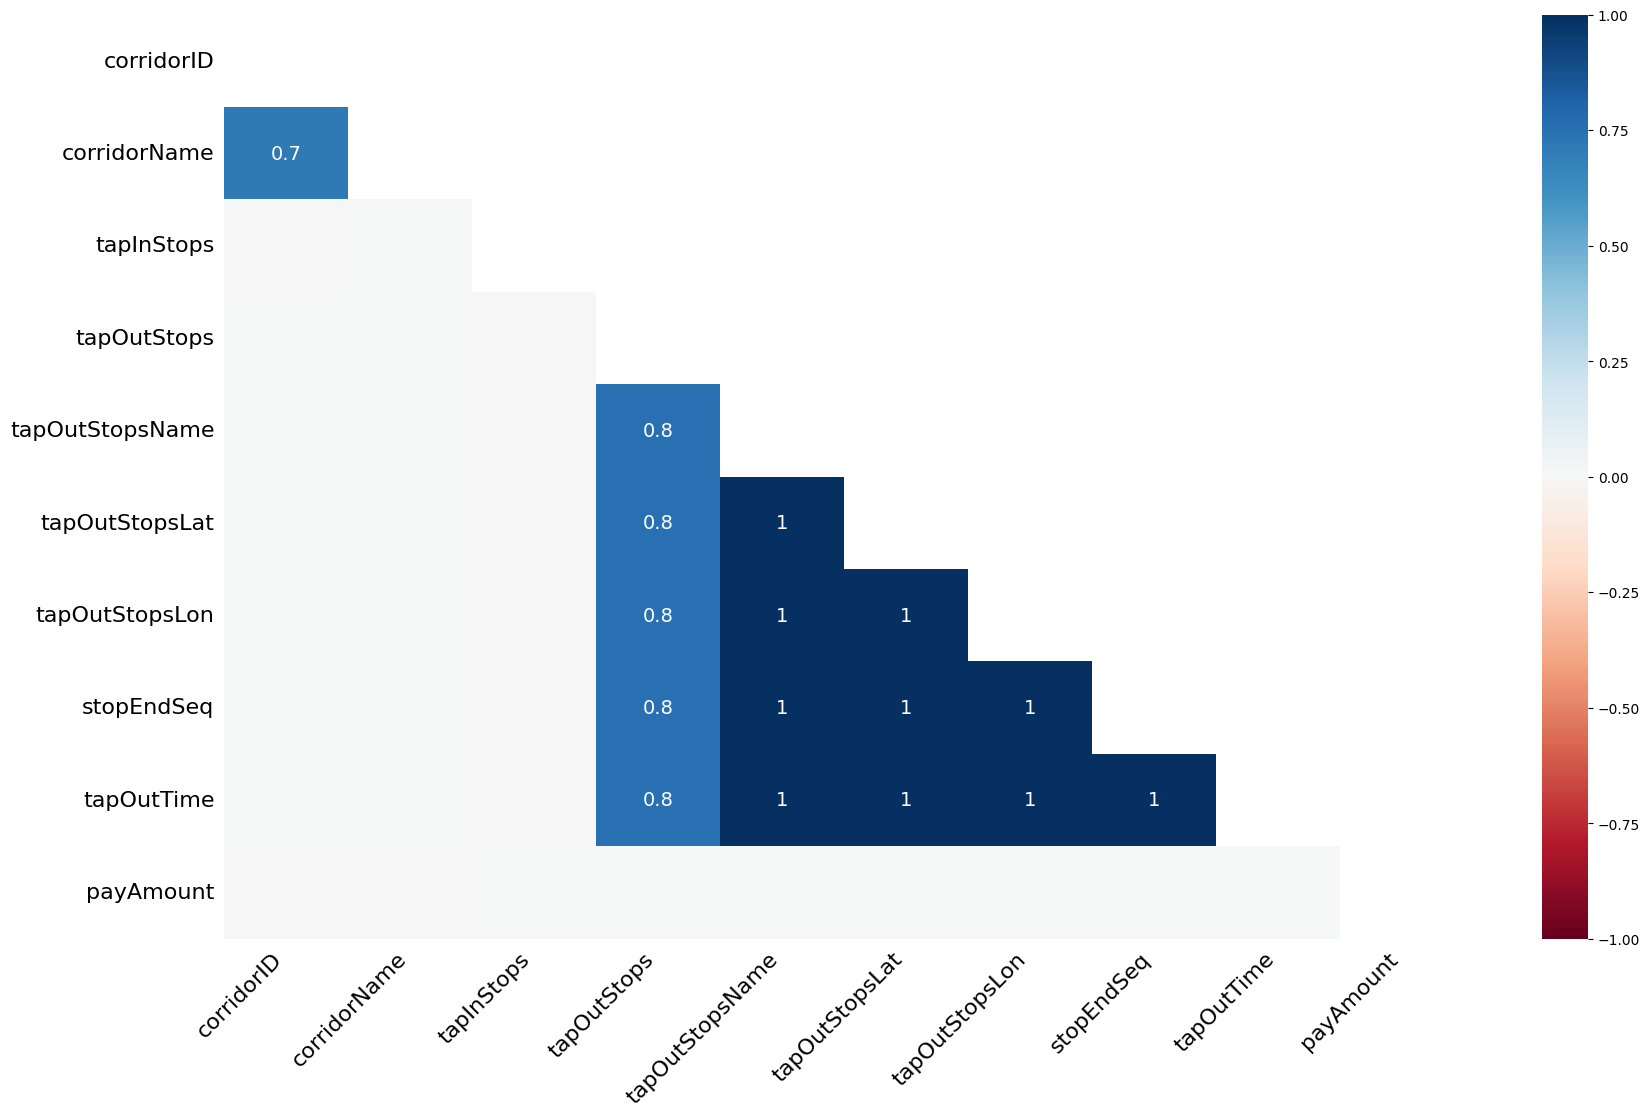

In [307]:
# Visualisasi missing value
msno.heatmap(df)

## Meninjau Korelasi Tertinggi antar Variabel

Untuk memahami hubungan antar variabel numerik dalam dataset, kita dapat menggunakan visualisasi *heatmap* korelasi. Fokus utama kita adalah melihat variabel-variabel yang memiliki **korelasi sangat tinggi (mendekati atau sama dengan 1)**, karena hal ini dapat menunjukkan adanya duplikasi informasi atau hubungan yang sangat kuat yang layak diperhatikan lebih lanjut.

Mari kita tinjau korelasi antar variabel dan identifikasi pasangan-pasangan dengan nilai korelasi tertinggi.


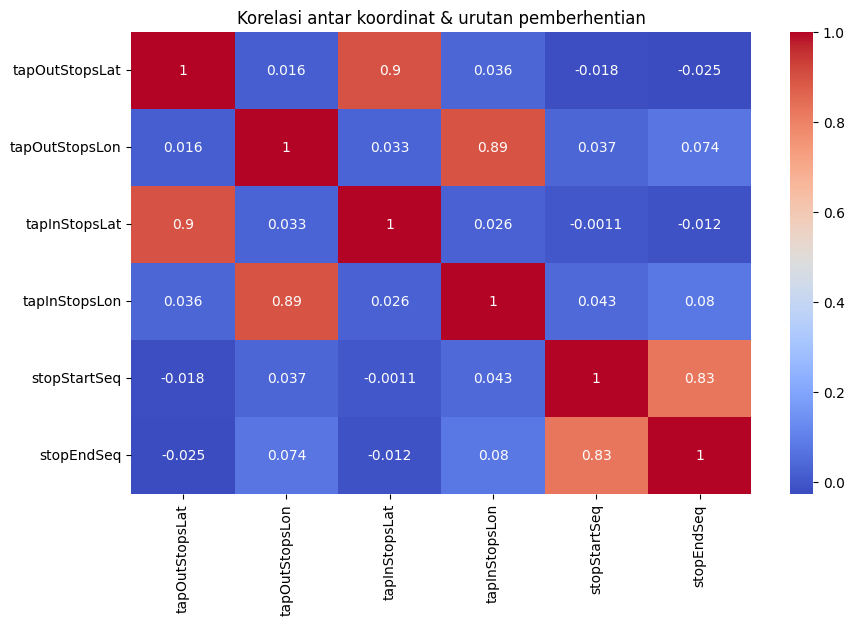

In [308]:
num_cols = ['tapOutStopsLat', 'tapOutStopsLon', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'stopEndSeq']
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Korelasi antar koordinat & urutan pemberhentian")
plt.show()

## Temuan *Missing Values*

Berdasarkan eksplorasi awal terhadap data, diperoleh beberapa temuan penting terkait nilai yang hilang (*missing values*), yaitu:

1. **Proporsi missing values** pada kolom-kolom terkait berada di kisaran **3–6%**, dengan **tidak ditemukan duplikasi data (0 duplicate rows)**.

2. Terdapat **korelasi menengah hingga tinggi** antara kolom `CorridorID` dan `CorridorName`, yang menunjukkan bahwa keduanya saling berkaitan dan bisa saling melengkapi saat terdapat nilai yang hilang.

3. Kolom `TapOutStop` memiliki korelasi menengah hingga tinggi dengan kolom:
   - `tapOutStopsName`
   - `tapOutStopsLat`
   - `tapOutStopsLon`
   - `stopEndSeq`

4. Keempat kolom tersebut (`tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, dan `stopEndSeq`) memiliki **korelasi sangat tinggi** satu sama lain, yang artinya ketika salah satu memiliki nilai, kemungkinan besar kolom lainnya juga relevan atau berasal dari sumber informasi yang sama.

---

## Penanganan *Missing Values*

Berdasarkan temuan di atas, langkah penanganan *missing values* dilakukan sebagai berikut:

1. **Imputasi berbasis korelasi**  
   Nilai-nilai yang hilang diisi berdasarkan nilai kolom lain yang berkorelasi tinggi. Misalnya, jika `CorridorID` kosong tetapi `CorridorName` tersedia, maka nilai `CorridorID` bisa ditentukan berdasarkan relasi yang ada.

2. **Pengisian default saat data tidak tersedia sepenuhnya**  
   Jika terdapat baris yang memiliki banyak kolom kosong dan tidak bisa diisi dari kolom yang lain, maka nilai kosong akan diisi dengan label default seperti `"Tidak Ada Data"` untuk menjaga konsistensi data saat visualisasi atau analisis lebih lanjut.

---

Pendekatan ini menjaga agar data tetap informatif dan tidak bias akibat penghapusan baris, serta memaksimalkan informasi yang bisa diambil dari relasi antar kolom.


### Penanganan *Missing Values* Tahap 1: Pengisian Data dengan Memanfaatkan Sifat Korelasi Data

Pada tahap pertama penanganan *missing values*, kita akan mengisi nilai yang hilang menggunakan korelasi antar kolom numerik yang relevan. Pendekatan ini bertujuan untuk memanfaatkan hubungan kuat antar kolom untuk mengisi kekosongan data dengan nilai yang lebih akurat.

#### Langkah-langkah:
1. **Menghitung korelasi antar kolom numerik**  
   Pertama, kita akan menghitung korelasi antar kolom numerik untuk memahami hubungan antar variabel. Hal ini memungkinkan kita untuk memilih kolom yang saling berkaitan secara erat, sehingga nilai yang hilang dapat diisi berdasarkan kolom yang memiliki korelasi tinggi.

2. **Pengisian nilai kosong menggunakan kolom berkorelasi tinggi**  
   Setelah mengidentifikasi kolom dengan korelasi tertinggi, nilai yang hilang pada kolom tersebut akan diisi dengan nilai dari kolom lain yang memiliki hubungan kuat, mengurangi potensi bias akibat imputasi acak.

Dengan cara ini, kita akan mempertahankan konsistensi data, memaksimalkan penggunaan informasi yang ada, dan memastikan data yang dihasilkan relevan dan lebih akurat untuk analisis berikutnya.

In [309]:
print("\nKorelasi antar kolom numerik:\n", corr_matrix)


Korelasi antar kolom numerik:
                 tapOutStopsLat  tapOutStopsLon  tapInStopsLat  tapInStopsLon  \
tapOutStopsLat        1.000000        0.016244       0.899224       0.035634   
tapOutStopsLon        0.016244        1.000000       0.033296       0.892529   
tapInStopsLat         0.899224        0.033296       1.000000       0.026214   
tapInStopsLon         0.035634        0.892529       0.026214       1.000000   
stopStartSeq         -0.017807        0.037464      -0.001103       0.043186   
stopEndSeq           -0.025369        0.073888      -0.012108       0.080392   

                stopStartSeq  stopEndSeq  
tapOutStopsLat     -0.017807   -0.025369  
tapOutStopsLon      0.037464    0.073888  
tapInStopsLat      -0.001103   -0.012108  
tapInStopsLon       0.043186    0.080392  
stopStartSeq        1.000000    0.825642  
stopEndSeq          0.825642    1.000000  


### Pengolahan Kolom `direction` dan `tapIn/OutTime`

Untuk meningkatkan pemahaman pembaca terhadap informasi pada kolom `direction` dan `tapIn/OutTime`, beberapa transformasi data dilakukan sebagai berikut:

1. **Pengubahan Nilai `direction`**  
   Kolom `direction` yang awalnya berisi angka `0` dan `1` akan diubah menjadi nilai kategorikal yang lebih mudah dipahami, yaitu:
   - `0` menjadi **"Berangkat"**
   - `1` menjadi **"Datang"**

   Langkah ini akan mempermudah interpretasi data dan memberikan konteks yang lebih jelas tentang arah perjalanan pengguna.

2. **Pengubahan Format Waktu pada Kolom `tapInTime` dan `tapOutTime`**  
   Kolom `tapInTime` dan `tapOutTime` yang awalnya memiliki format *string* akan diubah menjadi **`datetime object`**.  
   Dengan konversi ini, kita dapat melakukan analisis lebih lanjut seperti pemisahan jam, menit, atau tanggal, serta memudahkan dalam melakukan analisis berbasis waktu, misalnya untuk mencari pola penggunaan berdasarkan jam atau hari.

---

Transformasi ini akan memastikan data lebih mudah dipahami, serta meningkatkan kemudahan analisis lebih lanjut, seperti pemetaan waktu dan analisis tren pergerakan pengguna.


In [310]:
df['direction'] = df['direction'].replace({0: 'Berangkat', 1: 'Datang'})
df['tapInTime'] = pd.to_datetime(df['tapInTime'], format='%Y-%m-%d %H:%M:%S')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  object        
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

### Pemisahan Tanggal dan Waktu untuk Mempermudah Visualisasi

Agar data lebih mudah dianalisis dan divisualisasikan, saya akan melakukan pemisahan kolom **tanggal** dan **waktu** pada kolom `tapInTime` dan `tapOutTime` menjadi kolom-kolom terpisah. Langkah ini bertujuan untuk memudahkan analisis berbasis waktu dan memungkinkan visualisasi yang lebih spesifik.

#### Langkah-langkah:
1. **Kolom `tapInTime`**  
   Kolom `tapInTime` yang awalnya berisi informasi gabungan tanggal dan waktu akan dipisah menjadi dua kolom baru:
   - `tapInClocks`: Berisi informasi waktu (jam, menit, detik) dari kolom `tapInTime`.
   - `tapInDate`: Berisi informasi tanggal dari kolom `tapInTime`.

2. **Kolom `tapOutTime`**  
   Begitu pula dengan kolom `tapOutTime`, akan ditambahkan dua kolom baru:
   - `tapOutClocks`: Berisi waktu (jam, menit, detik) dari kolom `tapOutTime`.
   - `tapOutDate`: Berisi tanggal dari kolom `tapOutTime`.

#### Manfaat dari Pemisahan Ini:
- Pemisahan kolom tanggal dan waktu memungkinkan analisis yang lebih mendalam terkait **waktu penggunaan** (misalnya, analisis jam sibuk atau pemetaan aktivitas harian).
- Dengan memisahkan data tanggal dan waktu, kita dapat dengan mudah mengelompokkan data berdasarkan **hari, minggu, bulan**, atau **jam tertentu**, yang sangat berguna untuk visualisasi data.

---

Transformasi ini mempermudah eksplorasi data dan memberikan gambaran yang lebih jelas dalam analisis pergerakan pengguna Transjakarta sepanjang waktu.


In [311]:
# Memisahkan tanggal dan waktu dari tapInTime
df['tapInDate'] = df['tapInTime'].dt.date
df['tapInClocks'] = df['tapInTime'].dt.time

# Memisahkan tanggal dan waktu dari tapOutTime
df['tapOutDate'] = df['tapOutTime'].dt.date
df['tapOutClocks'] = df['tapOutTime'].dt.time

### Mensubtitusi Silang Missing Values pada `corridorID` dan `CorridorName`

Untuk menangani *missing values* pada kolom `corridorID` dan `CorridorName`, saya akan melakukan langkah-langkah berikut:

1. **Menghilangkan *Case Sensitivity* (Perbedaan Huruf Besar dan Kecil)**  
   Sebelum melakukan substitusi silang, penting untuk memastikan bahwa perbandingan nilai pada kolom `corridorID` dan `CorridorName` tidak terpengaruh oleh perbedaan huruf besar dan kecil. Untuk itu, saya akan mengubah semua teks pada kolom-kolom tersebut menjadi huruf kecil (lowercase) agar tidak terjadi kesalahan dalam pencocokan nilai.

2. **Mensubtitusi Silang (`corridorID` dan `CorridorName`)**  
   Setelah menghilangkan *case sensitivity*, langkah selanjutnya adalah mensubtitusi nilai *missing* pada kolom `corridorID` dan `CorridorName` dengan nilai yang relevan berdasarkan hubungan silang antar keduanya. Artinya, jika kolom `corridorID` kosong, akan diisi dengan nilai yang sesuai dengan `CorridorName` yang ada, dan sebaliknya.

#### Tujuan:
- Dengan menghilangkan *case sensitivity*, kita memastikan bahwa proses pencocokan nilai antar kolom lebih akurat dan tidak terpengaruh oleh perbedaan format teks.
- Mensubtitusi silang memungkinkan untuk mengisi nilai yang hilang berdasarkan relasi antar kolom, menjaga konsistensi dan integritas data.

---

Dengan proses ini, kita dapat memperbaiki data yang hilang tanpa mengubah struktur data yang ada, serta mempertahankan konsistensi dalam informasi yang digunakan untuk analisis lebih lanjut.

In [312]:
# Mengubah semua nilai pada kolom corridorID dan corridorName menjadi huruf kecil
df['corridorID'] = df['corridorID'].str.lower()
df['corridorName'] = df['corridorName'].str.lower()

In [313]:
# Membuat mapping dari corridorID ke corridorName dan sebaliknya
corridorID2Name = df[['corridorID', 'corridorName']].dropna().drop_duplicates('corridorID').set_index('corridorID')['corridorName'].to_dict()
corridorName2ID = df[['corridorID', 'corridorName']].dropna().drop_duplicates('corridorName').set_index('corridorName')['corridorID'].to_dict()

# Mensubstitusi missing values pada corridorName berdasarkan corridorID
df['corridorName'] = df['corridorName'].fillna(df['corridorID'].map(corridorID2Name))

# Mensubstitusi missing values pada corridorID berdasarkan corridorName
df['corridorID'] = df['corridorID'].fillna(df['corridorName'].map(corridorName2ID))

### Pemeriksaan Data Setelah Proses Cleaning pada `corridorID` dan `CorridorName`

Setelah melakukan pembersihan data dengan langkah-langkah yang telah dijelaskan sebelumnya, mari kita periksa hasil dari proses *data cleaning* pada dua kolom yaitu `corridorID` dan `CorridorName`. Hal ini penting untuk memastikan bahwa data yang telah dibersihkan dan disubstitusi telah sesuai dengan ekspektasi.

#### Langkah-langkah yang dilakukan:
1. **Menghapus *Case Sensitivity***  
   Kolom `corridorID` dan `CorridorName` telah diubah menjadi format huruf kecil untuk menghindari kesalahan dalam pencocokan nilai.
   
2. **Mensubtitusi Silang**  
   Kolom `corridorID` yang kosong telah diisi dengan nilai yang sesuai dari `CorridorName`, dan sebaliknya.

#### Tujuan Pemeriksaan:
- Memastikan bahwa data yang hilang pada kedua kolom tersebut telah diisi dengan benar tanpa merusak konsistensi data.
- Mengecek apakah pengolahan *missing values* menghasilkan data yang relevan dan sesuai konteks.

---

Mari kita lihat hasil pemeriksaannya dengan cara menampilkan beberapa sampel data yang telah dibersihkan:


In [314]:
InspectCorridorIDName = ['corridorID', 'corridorName']
print(df[InspectCorridorIDName].isna().sum())
print(df[InspectCorridorIDName].isna().sum()/df[InspectCorridorIDName].shape[0]*100)

corridorID      1125
corridorName    1125
dtype: int64
corridorID      2.968338
corridorName    2.968338
dtype: float64


### Penanganan Kekosongan Data pada `corridorID` dan `CorridorName`

Setelah memeriksa hasil pembersihan data pada kolom `corridorID` dan `CorridorName`, ternyata masih terdapat sekitar **kurang dari 3% data kosong**. Oleh karena itu, saya akan melakukan langkah selanjutnya untuk menangani kekosongan data ini dengan cara berikut:

#### Langkah yang akan dilakukan:
1. **Mengganti Data Kosong dengan "Tidak Ada Data"**  
   Untuk memastikan tidak ada nilai kosong dalam kolom yang mengganggu analisis lebih lanjut, saya akan mengganti semua nilai kosong pada kolom `corridorID` dan `CorridorName` dengan nilai **"Tidak Ada Data"**. Hal ini akan memudahkan dalam proses analisis dan menghindari kesalahan dalam perhitungan atau visualisasi.

#### Tujuan:
- Memastikan bahwa tidak ada nilai kosong pada kolom `corridorID` dan `CorridorName`.
- Mengganti nilai kosong dengan label yang jelas, yaitu **"Tidak Ada Data"**, agar bisa dibedakan dari data yang terisi dengan nilai yang valid.

---

Setelah proses ini, kolom-kolom tersebut akan lebih konsisten dan siap untuk dianalisis lebih lanjut.


In [315]:
# Mengisi nilai kosong dengan "tidak ada data"
df[['corridorID', 'corridorName']] = df[['corridorID', 'corridorName']].fillna("tidak ada data")

In [316]:
print(df[InspectCorridorIDName].isna().sum())
print(df[InspectCorridorIDName].isna().sum()/df[InspectCorridorIDName].shape[0]*100)
print(df.isna().sum()/df.shape[0]*100)

corridorID      0
corridorName    0
dtype: int64
corridorID      0.0
corridorName    0.0
dtype: float64
transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          0.000000
corridorName        0.000000
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
tapInDate           0.000000
tapInClocks         0.000000
tapOutDate          3.546174
tapOutClocks        3.546174
dtype: float64


###  Imputasi Berdasarkan Korelasi Tinggi pada Data

Setelah mengganti *missing values* dengan "Tidak Ada Data", langkah selanjutnya adalah melakukan **imputasi data** berdasarkan kolom-kolom dengan korelasi tinggi. Imputasi bertujuan untuk mengisi nilai yang hilang dengan menggunakan data yang memiliki hubungan kuat dengan kolom lainnya. 

#### Langkah yang akan dilakukan:
1. **Identifikasi Kolom dengan Korelasi Tinggi**  
   Berdasarkan analisis korelasi sebelumnya, beberapa kolom memiliki korelasi yang sangat tinggi dengan kolom lainnya. Misalnya, kolom `TapOutStop` memiliki korelasi yang sangat tinggi dengan `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, dan `stopEndSeq`. Korelasi ini menunjukkan bahwa nilai pada kolom-kolom tersebut saling berhubungan.

2. **Imputasi Menggunakan Nilai yang Relevan**  
   Kolom yang memiliki nilai *missing* akan diisi dengan nilai dari kolom yang memiliki korelasi tinggi. Contohnya, jika ada data yang hilang pada `TapOutStop`, nilai tersebut dapat diimputasi berdasarkan nilai dari kolom yang memiliki korelasi tinggi, seperti `tapOutStopsName`, `tapOutStopsLat`, dan seterusnya.

#### Tujuan:
- Mengisi nilai yang hilang dengan cara yang lebih akurat berdasarkan hubungan antar kolom.
- Menjaga integritas data dan memperkecil potensi kesalahan dalam analisis karena data yang hilang.

---

Proses imputasi ini akan dilakukan menggunakan teknik yang sesuai, misalnya menggunakan rata-rata atau nilai modus jika relevan, atau dengan teknik lain berdasarkan hubungan korelasi antar kolom.


In [317]:
if corr_matrix.loc['stopStartSeq', 'stopEndSeq'] > 0.8:
    selisih = (df['stopEndSeq'] - df['stopStartSeq']).dropna().mean()
    df['stopStartSeq'] = df['stopStartSeq'].fillna(df['stopEndSeq'] - selisih)
if corr_matrix.loc['tapInStopsLat', 'tapOutStopsLat'] > 0.8:
    delta_lat = (df['tapOutStopsLat'] - df['tapInStopsLat']).dropna().mean()
    df['tapInStopsLat'] = df['tapInStopsLat'].fillna(df['tapOutStopsLat'] - delta_lat)
    df['tapOutStopsLat'] = df['tapOutStopsLat'].fillna(df['tapInStopsLat'] + delta_lat)
if corr_matrix.loc['tapInStopsLon', 'tapOutStopsLon'] > 0.8:
    delta_lon = (df['tapOutStopsLon'] - df['tapInStopsLon']).dropna().mean()
    df['tapInStopsLon'] = df['tapInStopsLon'].fillna(df['tapOutStopsLon'] - delta_lon)
    df['tapOutStopsLon'] = df['tapOutStopsLon'].fillna(df['tapInStopsLon'] + delta_lon)

### Identifikasi Kekosongan Data Setelah Imputasi

Setelah melakukan imputasi berdasarkan kolom dengan korelasi tinggi, langkah selanjutnya adalah melakukan **identifikasi kekosongan data** untuk memastikan bahwa semua nilai kosong telah terisi dengan benar dan tidak ada nilai yang hilang yang terlewatkan.

#### Langkah yang akan dilakukan:
1. **Memeriksa Kolom dengan Kekosongan Data**  
   Kita akan memeriksa apakah masih ada nilai yang hilang pada dataset setelah proses imputasi. Hal ini penting untuk memastikan bahwa seluruh proses imputasi berjalan dengan baik dan tidak ada kolom yang masih memiliki nilai kosong.

2. **Memeriksa Persentase Kekosongan Data**  
   Selain memeriksa kolom yang kosong, kita juga akan menghitung persentase kekosongan data untuk memahami seberapa signifikan data yang hilang setelah proses imputasi.

#### Tujuan:
- Memastikan bahwa proses imputasi berjalan dengan baik dan semua data yang hilang sudah terisi.
- Memastikan kualitas data yang akan digunakan dalam analisis lebih lanjut.

---

Mari kita cek apakah data yang hilang sudah sepenuhnya teratasi setelah proses imputasi.


In [318]:
InspectTaps = ['stopStartSeq', 'stopEndSeq', 'tapInStopsLat', 'tapOutStopsLat', 'tapInStopsLon', 'tapOutStopsLon']
print(df[InspectTaps].isna().sum()/df[InspectTaps].shape[0]*100)

stopStartSeq      0.000000
stopEndSeq        3.546174
tapInStopsLat     0.000000
tapOutStopsLat    0.000000
tapInStopsLon     0.000000
tapOutStopsLon    0.000000
dtype: float64


### Perbaikan Missing Values pada `StopEndSeq`

Setelah melakukan identifikasi kekosongan data, saya menemukan bahwa kolom `StopEndSeq` masih memiliki nilai kosong. Berdasarkan analisis korelasi, kolom `StopEndSeq` memiliki korelasi yang sangat tinggi dengan kolom `stopStartSeq`. Oleh karena itu, untuk memperbaiki kekosongan data pada `StopEndSeq`, saya akan melakukan imputasi menggunakan nilai dari kolom `stopStartSeq`.

#### Langkah yang akan dilakukan:
1. **Imputasi Nilai `StopEndSeq` dengan `stopStartSeq`**  
   Mengingat korelasi yang sangat tinggi antara kedua kolom ini, saya akan mengisi nilai kosong pada kolom `StopEndSeq` menggunakan nilai yang ada pada kolom `stopStartSeq` yang relevan. Hal ini akan mempertahankan konsistensi data dan mengurangi potensi bias.

2. **Memeriksa Setelah Imputasi**  
   Setelah melakukan imputasi, saya akan memeriksa kembali kolom `StopEndSeq` untuk memastikan bahwa kekosongan data telah terisi dengan benar.

#### Tujuan:
- Mengisi nilai yang hilang pada kolom `StopEndSeq` dengan nilai yang relevan berdasarkan hubungan yang kuat dengan kolom `stopStartSeq`.
- Memastikan bahwa kolom `StopEndSeq` kini memiliki data yang lengkap dan siap digunakan dalam analisis lebih lanjut.

---

Proses ini akan meningkatkan kualitas data dan memastikan bahwa kolom `StopEndSeq` berisi informasi yang lebih akurat untuk analisis selanjutnya.


In [319]:
# Mengisi nilai kosong pada stopEndSeq berdasarkan rata-rata perbedaan dengan stopStartSeq
if 'stopStartSeq' in df.columns and 'stopEndSeq' in df.columns:
    selisih_stop = (df['stopEndSeq'] - df['stopStartSeq']).dropna().mean()
    df['stopEndSeq'] = df['stopEndSeq'].fillna(df['stopStartSeq'] + selisih_stop)

In [320]:
InspectSSS = ['stopStartSeq']
print(df[InspectSSS].isna().sum()/df[InspectSSS].shape[0]*100)

stopStartSeq    0.0
dtype: float64


### Perbaikan Missing Values pada `payAmount`

Setelah melakukan identifikasi kekosongan data, saya menemukan bahwa kolom `payAmount` memiliki nilai kosong. Berdasarkan informasi yang ada, kolom ini berisi data mengenai pembayaran, yang terbagi antara transaksi berbayar dan gratis. Untuk mengatasi kekosongan data pada kolom ini, saya akan mengubah nilai kosong pada `payAmount` menjadi **0**.

#### Langkah yang akan dilakukan:
1. **Mengisi Kekosongan pada `payAmount` dengan 0**  
   Karena nilai kosong pada kolom `payAmount` bisa menunjukkan transaksi yang tidak berbayar (gratis), saya akan mengganti semua nilai kosong pada kolom ini dengan **0**, yang menandakan bahwa transaksi tersebut tidak melibatkan pembayaran.

2. **Memeriksa Setelah Pengisian**  
   Setelah melakukan perubahan, saya akan memeriksa kembali kolom `payAmount` untuk memastikan bahwa seluruh nilai kosong telah diganti dengan benar.

#### Tujuan:
- Mengisi nilai kosong pada kolom `payAmount` dengan angka **0** untuk mencerminkan transaksi yang tidak melibatkan pembayaran.
- Memastikan konsistensi data dalam analisis lebih lanjut, terutama dalam membedakan transaksi berbayar dan gratis.

---

Dengan langkah ini, saya akan memastikan bahwa data pada kolom `payAmount` siap digunakan untuk analisis yang lebih mendalam mengenai transaksi berbayar dan gratis pada Transjakarta.


In [321]:
df['payAmount'] = df['payAmount'].fillna(0)

### Cek Kolom yang Memiliki Missing Values

Untuk memastikan kualitas data, langkah pertama adalah memeriksa kolom-kolom yang masih memiliki **missing values** setelah dilakukan proses imputasi dan pengisian. Proses ini penting untuk mengetahui apakah ada kolom yang masih memerlukan perhatian lebih lanjut sebelum data digunakan dalam analisis.

#### Langkah yang akan dilakukan:
1. **Memeriksa Kolom dengan Missing Values**  
   Saya akan melakukan pengecekan terhadap setiap kolom dalam dataset untuk melihat apakah masih ada nilai kosong (missing values). Kolom yang memiliki missing values akan diidentifikasi untuk diberikan penanganan lebih lanjut, apakah melalui imputasi, penghapusan, atau pengisian dengan nilai yang relevan.

2. **Visualisasi Missing Values**  
   Untuk memudahkan pemantauan, saya akan menampilkan visualisasi atau statistik terkait missing values pada setiap kolom, sehingga lebih mudah untuk melihat pola dan memperkirakan penanganan yang tepat.

#### Tujuan:
- Mengidentifikasi kolom yang masih memiliki nilai kosong setelah dilakukan imputasi dan pengisian.
- Menyusun langkah-langkah untuk penanganan missing values yang lebih efektif.

---

Langkah ini akan membantu memastikan bahwa seluruh dataset bebas dari missing values dan siap digunakan dalam analisis selanjutnya.


In [322]:
missing_columns = df.columns[df.isnull().any()]
missing_values = df[missing_columns].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Kolom dengan missing values:")
print(missing_percentage[missing_percentage > 0])

Kolom dengan missing values:
tapInStops         3.200528
tapOutStops        6.039578
tapOutStopsName    3.546174
tapOutTime         3.546174
tapOutDate         3.546174
tapOutClocks       3.546174
dtype: float64


### Breakdown dan Integrasi Kolom Lokasi Pemberhentian

Mari kita *breakdown* terlebih dahulu tiga kolom utama yang masih memiliki missing values, yaitu `tapInStops`, `tapOutStops`, dan `tapOutStopsName`. Ketiga kolom ini menyimpan informasi penting mengenai titik naik dan turun pengguna Transjakarta.

#### Langkah yang Akan Dilakukan:
1. **Identifikasi Missing Values**  
   Saya akan meninjau jumlah dan pola missing values pada ketiga kolom tersebut.

2. **Integrasi dengan Kolom Terkait**  
   Untuk mengisi missing values, saya akan mencoba mengintegrasikan informasi dari kolom-kolom lain yang berkaitan, seperti `tapInStopsName`, `tapOutStopsName`, dan koordinat lokasi (`tapInStopsLat`, `tapOutStopsLat`, dll).

3. **Tujuan Integrasi**  
   Dengan menggabungkan informasi dari nama pemberhentian dan koordinat, diharapkan saya dapat mengisi kekosongan data pada kolom `tapInStops`, `tapOutStops`, dan `tapOutStopsName` secara lebih akurat dan kontekstual.

---

Langkah ini penting agar seluruh informasi rute dan lokasi pemberhentian lebih lengkap dan akurat, sehingga mendukung analisis pola perjalanan secara lebih menyeluruh.


In [323]:
# Membuat mapping dari tapInStops ke tapInStopsName dan sebaliknya
tapInStops_to_Name = df[['tapInStops', 'tapInStopsName']].dropna().drop_duplicates('tapInStops').set_index('tapInStops')['tapInStopsName'].to_dict()
tapInName_to_Stops = df[['tapInStops', 'tapInStopsName']].dropna().drop_duplicates('tapInStopsName').set_index('tapInStopsName')['tapInStops'].to_dict()

# Mengisi missing values pada tapInStopsName berdasarkan tapInStops
df['tapInStopsName'] = df['tapInStopsName'].fillna(df['tapInStops'].map(tapInStops_to_Name))

# Mengisi missing values pada tapInStops berdasarkan tapInStopsName
df['tapInStops'] = df['tapInStops'].fillna(df['tapInStopsName'].map(tapInName_to_Stops))

# Membuat mapping dari tapOutStops ke tapOutStopsName dan sebaliknya
tapOutStops_to_Name = df[['tapOutStops', 'tapOutStopsName']].dropna().drop_duplicates('tapOutStops').set_index('tapOutStops')['tapOutStopsName'].to_dict()
tapOutName_to_Stops = df[['tapOutStops', 'tapOutStopsName']].dropna().drop_duplicates('tapOutStopsName').set_index('tapOutStopsName')['tapOutStops'].to_dict()

# Mengisi missing values pada tapOutStopsName berdasarkan tapOutStops
df['tapOutStopsName'] = df['tapOutStopsName'].fillna(df['tapOutStops'].map(tapOutStops_to_Name))

# Mengisi missing values pada tapOutStops berdasarkan tapOutStopsName
df['tapOutStops'] = df['tapOutStops'].fillna(df['tapOutStopsName'].map(tapOutName_to_Stops))

### Pemeriksaan Akhir *Missing Values*

Setelah melakukan berbagai proses *data cleaning* dan imputasi terhadap kolom-kolom yang memiliki missing values, kini saatnya melakukan pengecekan akhir.

Langkah ini bertujuan untuk memastikan bahwa semua kolom telah ditangani sesuai dengan strategi masing-masing, baik melalui:
- Pengisian berdasarkan kolom berkorelasi tinggi,
- Pengisian dengan nilai default (misalnya `tidak ada data` atau 0),
- Ataupun melalui integrasi antar kolom nama dan koordinat.

Mari kita cek kembali jumlah missing values yang tersisa setelah proses tersebut.


In [324]:
Inspect3 = ['tapInStops', 'tapOutStops', 'tapOutStopsName']
print(df[Inspect3].isna().sum()/df[Inspect3].shape[0]*100)

tapInStops         0.089710
tapOutStops        3.596306
tapOutStopsName    3.546174
dtype: float64


### Integrasi Lanjutan: Subsidi Silang pada Data Lokasi dan Nama Halte

Meskipun sebagian besar *missing values* telah berhasil ditangani, ternyata masih terdapat kekosongan pada beberapa kolom penting, seperti `tapInStops`, `tapOutStops`, dan `tapOutStopsName`.

Sebagai langkah lanjutan, saya akan mencoba melakukan **subsidi silang** dengan mengintegrasikan kolom-kolom tersebut menggunakan informasi dari:
- `tapInStopsLat` dan `tapInStopsLon`
- `tapOutStopsLat` dan `tapOutStopsLon`

Dengan pendekatan ini, data yang belum lengkap dapat ditelusuri dan diisi berdasarkan *koordinat lokasi halte*, sehingga memungkinkan kita untuk menyajikan informasi halte secara lebih akurat dan utuh.


In [325]:
# Mengisi missing values pada tapInStopsLat dan tapInStopsLon berdasarkan tapInStops
tapInStops_to_LatLon = df[['tapInStops', 'tapInStopsLat', 'tapInStopsLon']].dropna().drop_duplicates('tapInStops').set_index('tapInStops')[['tapInStopsLat', 'tapInStopsLon']].to_dict(orient='index')
df['tapInStopsLat'] = df['tapInStopsLat'].fillna(df['tapInStops'].map(lambda x: tapInStops_to_LatLon.get(x, {}).get('tapInStopsLat')))
df['tapInStopsLon'] = df['tapInStopsLon'].fillna(df['tapInStops'].map(lambda x: tapInStops_to_LatLon.get(x, {}).get('tapInStopsLon')))

# Mengisi missing values pada tapOutStopsLat dan tapOutStopsLon berdasarkan tapOutStops
tapOutStops_to_LatLon = df[['tapOutStops', 'tapOutStopsLat', 'tapOutStopsLon']].dropna().drop_duplicates('tapOutStops').set_index('tapOutStops')[['tapOutStopsLat', 'tapOutStopsLon']].to_dict(orient='index')
df['tapOutStopsLat'] = df['tapOutStopsLat'].fillna(df['tapOutStops'].map(lambda x: tapOutStops_to_LatLon.get(x, {}).get('tapOutStopsLat')))
df['tapOutStopsLon'] = df['tapOutStopsLon'].fillna(df['tapOutStops'].map(lambda x: tapOutStops_to_LatLon.get(x, {}).get('tapOutStopsLon')))

# Mengisi missing values pada tapInStops dan tapOutStops berdasarkan koordinat
LatLon_to_tapInStops = df[['tapInStopsLat', 'tapInStopsLon', 'tapInStops']].dropna().drop_duplicates(['tapInStopsLat', 'tapInStopsLon']).set_index(['tapInStopsLat', 'tapInStopsLon'])['tapInStops'].to_dict()
df['tapInStops'] = df['tapInStops'].fillna(df.apply(lambda row: LatLon_to_tapInStops.get((row['tapInStopsLat'], row['tapInStopsLon'])), axis=1))

LatLon_to_tapOutStops = df[['tapOutStopsLat', 'tapOutStopsLon', 'tapOutStops']].dropna().drop_duplicates(['tapOutStopsLat', 'tapOutStopsLon']).set_index(['tapOutStopsLat', 'tapOutStopsLon'])['tapOutStops'].to_dict()
df['tapOutStops'] = df['tapOutStops'].fillna(df.apply(lambda row: LatLon_to_tapOutStops.get((row['tapOutStopsLat'], row['tapOutStopsLon'])), axis=1))

In [326]:
Inspect3 = ['tapInStops', 'tapOutStops', 'tapOutStopsName']
print(df[Inspect3].isna().sum()/df[Inspect3].shape[0]*100)
print(df[Inspect3].isna().sum())

tapInStops         0.089710
tapOutStops        3.596306
tapOutStopsName    3.546174
dtype: float64
tapInStops           34
tapOutStops        1363
tapOutStopsName    1344
dtype: int64


### Hasil Integrasi: Belum Memberikan Perubahan Signifikan

Setelah mencoba mengintegrasikan data `tapInStops`, `tapOutStops`, dan `tapOutStopsName` dengan data koordinat (`tapInStopsLat`, `tapInStopsLon`, `tapOutStopsLat`, dan `tapOutStopsLon`) melalui metode subsidi silang, ternyata belum terdapat perubahan signifikan terhadap *missing values*.

Kemungkinan besar hal ini disebabkan oleh kurang lengkapnya data referensi atau tidak terdapat pasangan data yang cukup untuk melakukan imputasi silang secara akurat.

### Langkah Selanjutnya: Pengecekan Ulang *Missing Values*

Sebagai tindak lanjut, mari kita kembali memeriksa kolom-kolom yang masih mengandung *missing values* untuk memastikan jumlah dan distribusinya. Hal ini akan membantu dalam menentukan strategi penanganan akhir yang lebih tepat.


In [327]:
missing_columns = df.columns[df.isnull().any()]
missing_values = df[missing_columns].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Kolom dengan missing values:")
print(missing_percentage[missing_percentage > 0])
print(missing_values)

Kolom dengan missing values:
tapInStops         0.089710
tapOutStops        3.596306
tapOutStopsName    3.546174
tapOutTime         3.546174
tapOutDate         3.546174
tapOutClocks       3.546174
dtype: float64
tapInStops           34
tapOutStops        1363
tapOutStopsName    1344
tapOutTime         1344
tapOutDate         1344
tapOutClocks       1344
dtype: int64


### Penanganan *Missing Values* Tahap 2: *ultimate missing value*

Setelah melalui berbagai upaya seperti integrasi silang antar kolom yang berkorelasi tinggi dan pendekatan berbasis koordinat maupun nama halte, ternyata masih terdapat sejumlah *missing values* yang tidak dapat diisi dengan metode logis atau referensial.

Pada tahap ini, Saya memutuskan untuk menghentikan eksplorasi lanjutan dan memilih pendekatan praktis, yaitu mengisi kekosongan data dengan string "tidak ada data" yang disesuaikan dengan konteks masing-masing kolom.

In [328]:
fillna_values = {
    'tapInStops': "tidak ada data Tap in",
    'tapOutStops': "tidak ada data Tap out",
    'tapInStopsName': "tidak ada data Tap in Name",
    'tapOutStopsName': "tidak ada data Tap out Name",
    'tapOutTime': "tidak ada data Tap out Time",
    'tapInTime': "tidak ada data Tap in Time",
    'tapInDate': "tidak ada data Tap in Date",
    'tapOutDate': "tidak ada data Tap out Date",
    'tapInClocks': "tidak ada data Tap in Clocks",
    'tapOutClocks': "tidak ada data Tap out Clocks"
}

df.fillna(value=fillna_values, inplace=True)

### Konklusi dari *Data Cleaning Missing Values*

- Upaya pengisian data kosong melalui integrasi silang berdasarkan korelasi antar kolom telah dilakukan, namun tidak sepenuhnya berhasil untuk semua kasus.
- Sebagai langkah akhir, *missing values* diisi dengan string `"tidak ada data"` yang disesuaikan dengan konteks masing-masing kolom, guna menjaga konsistensi dan mencegah error pada proses analisis berikutnya.
- Dengan demikian, tahap pembersihan data terhadap *missing values* telah selesai dan dataset siap digunakan untuk tahap analisis lanjutan.


## Melihat Isi Data Setelah Pembersihan

Setelah proses *data cleaning* selesai dilakukan, mari kita tinjau kembali isi dataset yang telah diperbarui. Langkah ini penting untuk memastikan bahwa data telah siap digunakan dalam proses analisis selanjutnya, baik dari sisi struktur, kualitas, maupun kelengkapan informasinya.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        37900 non-null  object        
 7   corridorName      37900 non-null  object        
 8   direction         37900 non-null  object        
 9   tapInStops        37900 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
tapInDate           0
tapInClocks         0
tapOutDate          0
tapOutClocks        0
dtype: int64

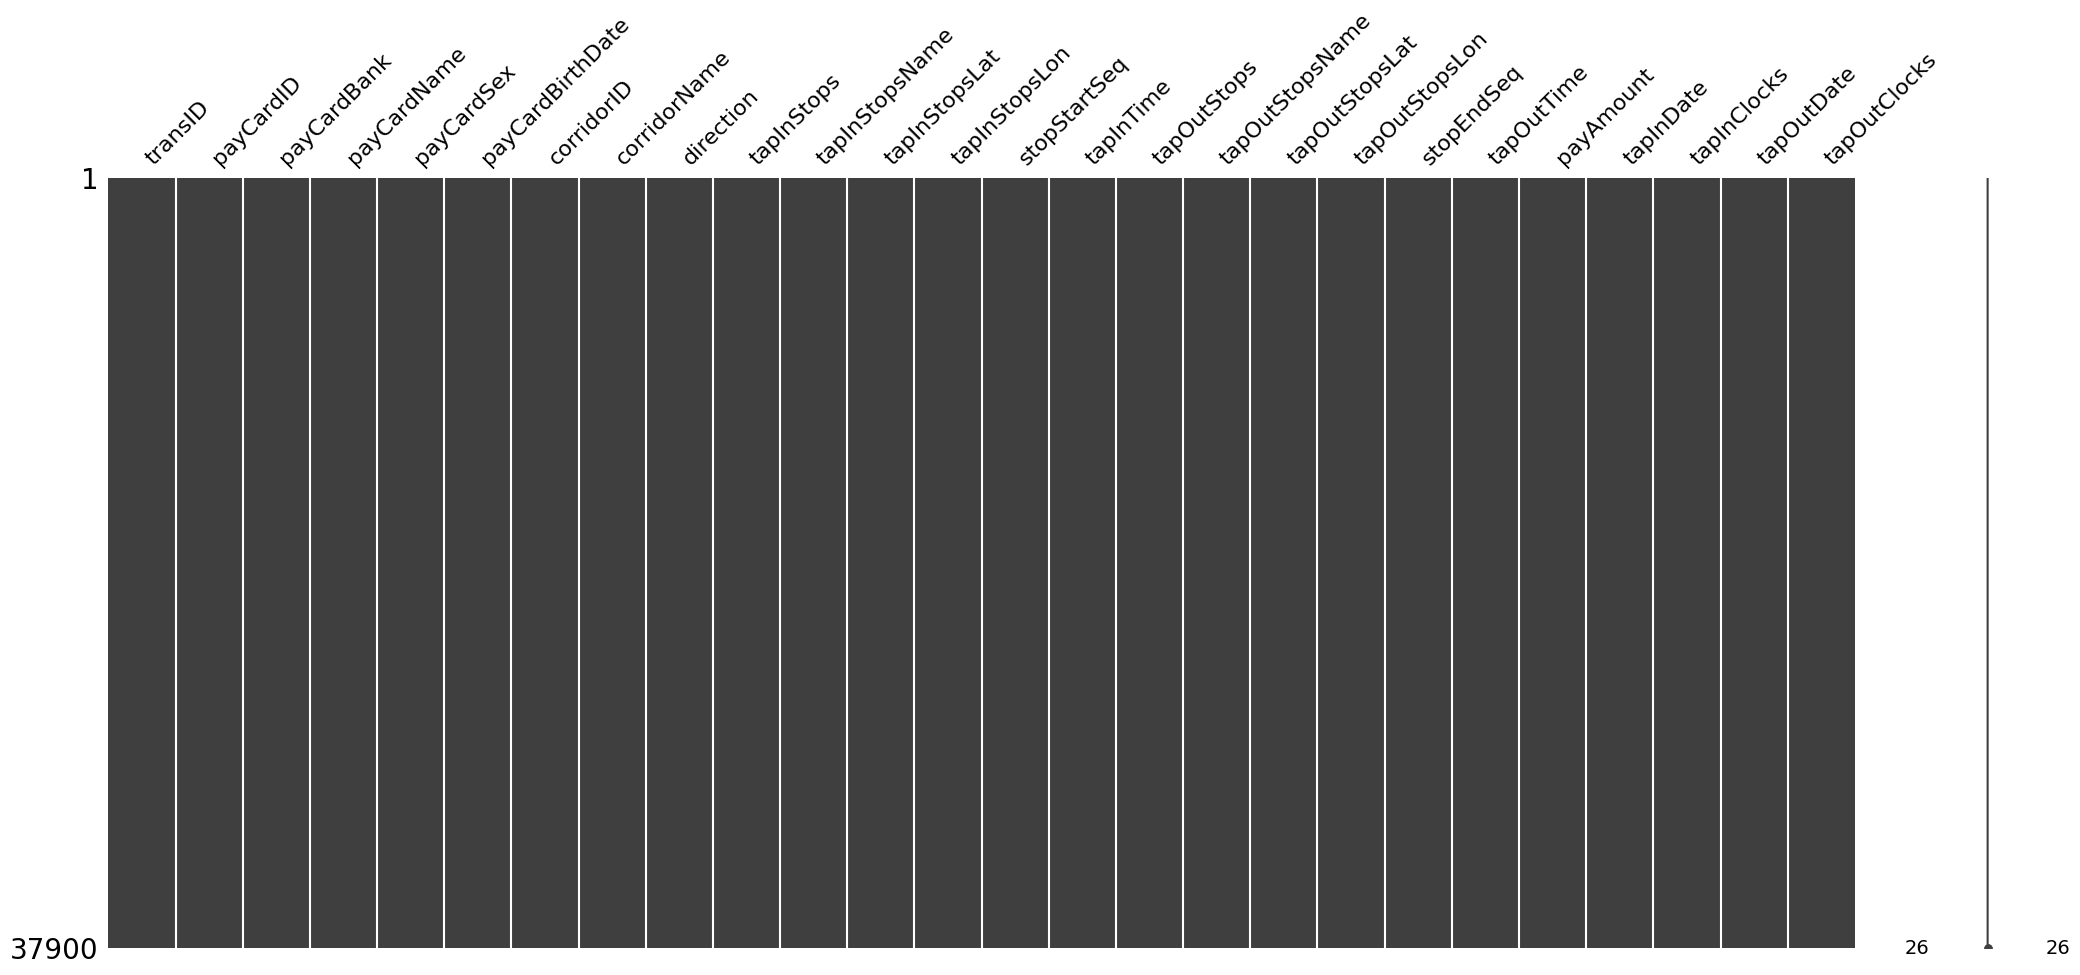

In [329]:
df
df.info()
msno.matrix(df)
df.isna().sum()

untuk memudahkan akses terhadap data yang telah dibersihkan, Saya akan membuat file baru terhadap data ini serta menampilkan informasinya.

In [330]:
df.to_csv("Transjakarta_cleaned.csv", index=False)
dfa = pd.read_csv('Transjakarta_cleaned.csv')
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        37900 non-null  object 
 7   corridorName      37900 non-null  object 
 8   direction         37900 non-null  object 
 9   tapInStops        37900 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       37900 non-null  object 
 16  tapOutStopsName   37900 non-null  object

# ****Analisis Data****

Seluruh *missing values* pada dataset telah berhasil ditangani. Kini, saya akan melanjutkan ke tahap analisis untuk menjawab permasalahan utama dalam penelitian ini. Proses analisis akan dilakukan menggunakan Python untuk eksplorasi data dan visualisasi awal, serta Tableau untuk menyajikan visualisasi interaktif yang dapat memperkuat pemahaman terhadap pola-pola yang ada dalam data.


## Data Visualising

Setelah melakukan tahap pembersihan data, kini saatnya untuk melakukan visualisasi terhadap data yang telah diproses. Berdasarkan data yang ada, terdapat tiga poin utama yang akan menjadi fokus eksplorasi dan akan disampaikan kepada *decision maker*:

1. **Frekuensi Pengguna Berdasarkan Bank, Usia, dan Jenis Kelamin**  
   Visualisasi ini akan menunjukkan distribusi frekuensi penggunaan moda transportasi Transjakarta berdasarkan kategori bank penerbit kartu, usia pengguna (dihitung dari tahun lahir), serta jenis kelamin pengguna.

2. **Frekuensi Penggunaan Transjakarta**  
   Visualisasi ini bertujuan untuk menunjukkan berapa kali pengguna melakukan perjalanan dengan Transjakarta dalam periode yang ditentukan. Hal ini penting untuk memahami tingkat ketergantungan pengguna terhadap moda transportasi ini.

3. **Frekuensi Rute Populer dan Jam Sibuk**  
   Dengan menggunakan visualisasi ini, kita dapat mengetahui rute-rute yang paling sering digunakan serta jam-jam sibuk pengguna Transjakarta. Informasi ini berguna untuk meningkatkan efisiensi jadwal operasional dan mengatur kapasitas armada.

Melalui tiga visualisasi utama ini, diharapkan dapat dihasilkan wawasan yang lebih mendalam mengenai kebiasaan pengguna Transjakarta, yang dapat digunakan untuk pengambilan keputusan strategis.

### Sumber Dana vs Usia vs Jenis Kelamin

Pada subbab ini, kita akan melakukan eksplorasi visualisasi mengenai perbandingan sumber dana pengguna Transjakarta berdasarkan bank, jenis kelamin, dan usia pengguna. Kolom yang akan digunakan dalam analisis ini adalah:

- **`payCardBank`**: Nama bank yang digunakan untuk pembayaran.
- **`payCardSex`**: Jenis kelamin pengguna.
- **`payCardBirthDate`**: Tahun lahir pengguna, yang nantinya akan dihitung menjadi usia.

Tujuan dari visualisasi ini adalah untuk mendapatkan gambaran mengenai sebaran pengguna Transjakarta berdasarkan usia dan jenis kelamin yang terhubung dengan sumber dana yang digunakan (bank). Dengan demikian, kita dapat melihat apakah ada kecenderungan tertentu mengenai penggunaan bank berdasarkan demografi usia dan gender.

Sebelum melakukan visualisasi, kita akan terlebih dahulu mencari tahu sebaran perbandingan rata-rata usia dan jenis kelamin pengguna berdasarkan bank yang digunakan. Hal ini akan memberikan gambaran awal mengenai hubungan antara demografi pengguna dengan pilihan sumber dana.

In [331]:
# Hitung avg usia berdasarkan bank dan jenis kelamin
avg_age = dfa.groupby(['payCardBank', 'payCardSex'])['payCardBirthDate'].mean().reset_index()
avg_age.columns = ['Bank', 'Jenis Kelamin', 'Tahun Lahir']
avg_age_avg = dfa.groupby(['payCardBank'])['payCardBirthDate'].mean().reset_index()
avg_age_avg.columns = ['Bank', 'Rata-rata Tahun Lahir']
# Hitung avg antara total seluruh avg F dan total seluruh avg M dari seluruh bank
avg_F = avg_age[avg_age['Jenis Kelamin'] == 'F']['Tahun Lahir'].mean()
avg_M = avg_age[avg_age['Jenis Kelamin'] == 'M']['Tahun Lahir'].mean()
avg_FM = pd.DataFrame({'avg_F': [avg_F], 'avg_M': [avg_M]})


display(avg_age, avg_age_avg, avg_FM) 

,Bank,Jenis Kelamin,Tahun Lahir
0,bni,F,1992.636783
1,bni,M,1992.004386
2,brizzi,F,1992.186813
3,brizzi,M,1987.652250
4,dki,F,1992.752175
5,dki,M,1986.305302
6,emoney,F,1994.044894
7,emoney,M,1987.535206
8,flazz,F,1992.640044
9,flazz,M,1985.191323


,Bank,Rata-rata Tahun Lahir
0,bni,1992.365450
1,brizzi,1989.989521
2,dki,1989.586352
3,emoney,1991.378823
4,flazz,1989.401670
5,online,1989.079122


,avg_F,avg_M
0,1992.723461,1987.485266


#### Visualisasi Sumber Dana Berdasarkan Jenis Kelamin dan Usia

Dalam analisis ini, saya akan membuat beberapa visualisasi untuk menggali lebih dalam mengenai hubungan antara sumber dana pengguna (bank), jenis kelamin, dan usia pengguna. Berikut adalah langkah-langkah yang akan saya ambil:

1. **Distribusi Sumber Dana Berdasarkan Jenis Kelamin**  
   Pertama, saya akan menggunakan untuk menampilkan distribusi jumlah pengguna berdasarkan bank yang digunakan, dengan pembagian berdasarkan jenis kelamin. Visualisasi ini akan memberikan gambaran mengenai seberapa banyak pengguna pria dan wanita yang menggunakan setiap bank yang tersedia. Saya juga akan menampilkan sumbu X dengan rotasi 90° agar nama-nama bank lebih mudah terbaca.

2. **Distribusi Usia Berdasarkan Sumber Dana dan Jenis Kelamin**
    Selanjutnya, saya akan menggunakan boxplot untuk melihat distribusi usia berdasarkan bank yang digunakan dan jenis kelamin pengguna. Hal ini akan memberikan gambaran mengenai rentang usia pengguna di setiap bank dan membandingkannya antar jenis kelamin.

3. **Rata-rata Usia Berdasarkan Bank dan Jenis Kelamin**
    Di sini, saya akan menggunakan barplot untuk menunjukkan rata-rata usia pengguna berdasarkan bank yang digunakan dan jenis kelamin. Ini akan memberikan insight tentang kelompok usia mana yang paling banyak menggunakan masing-masing bank.

4. **Rata-rata Tahun Lahir Berdasarkan Bank**
    Terakhir, saya akan membuat visualisasi barplot untuk menampilkan rata-rata tahun lahir pengguna berdasarkan bank yang digunakan. Ini akan memberikan gambaran umum mengenai usia rata-rata pengguna di setiap bank.

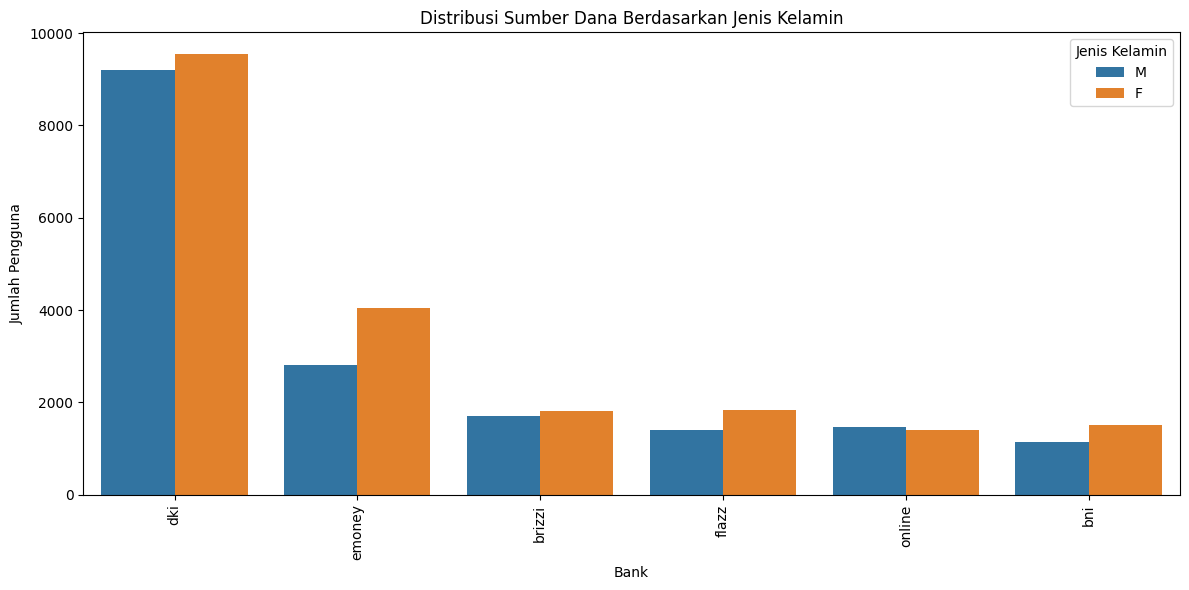

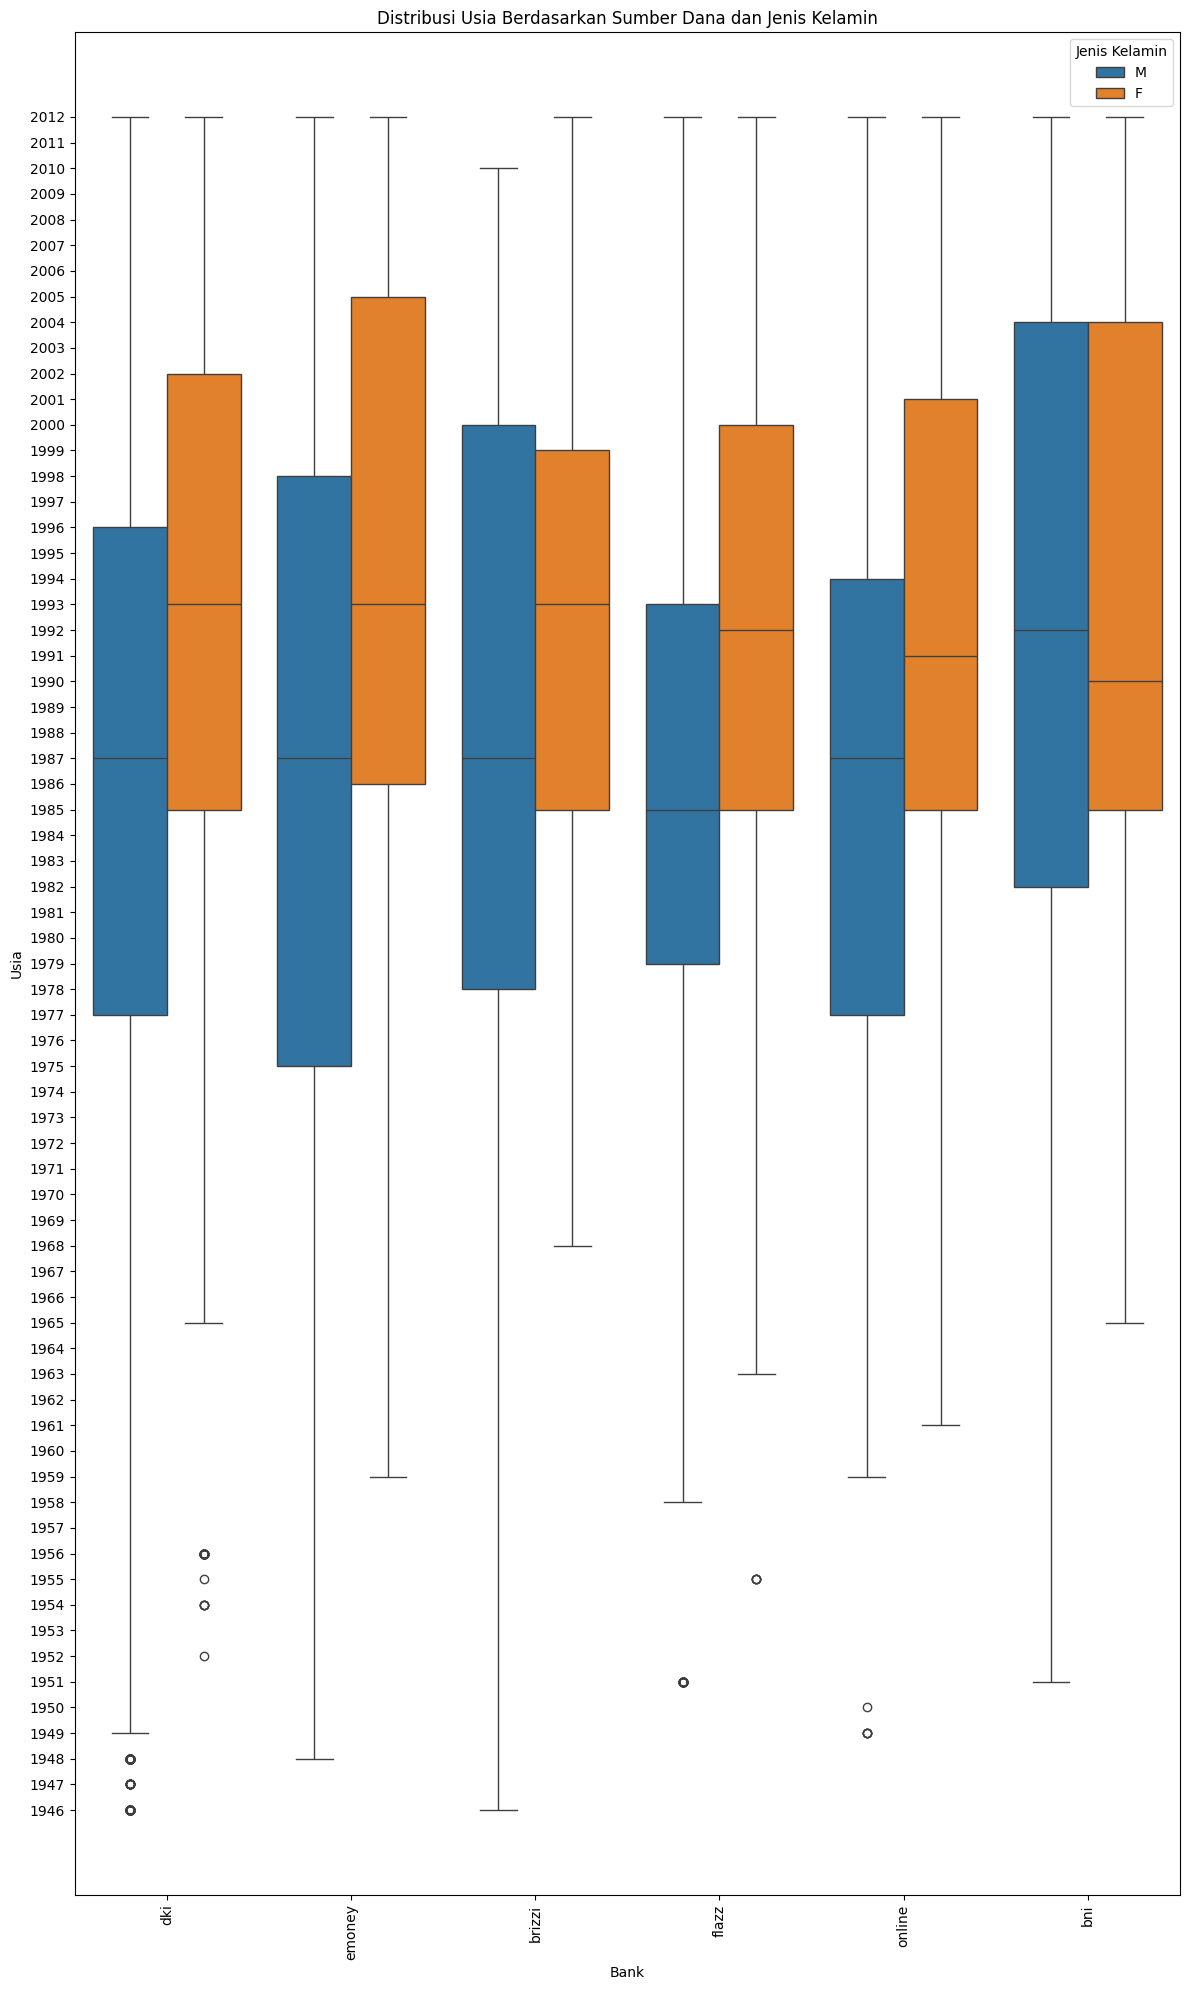

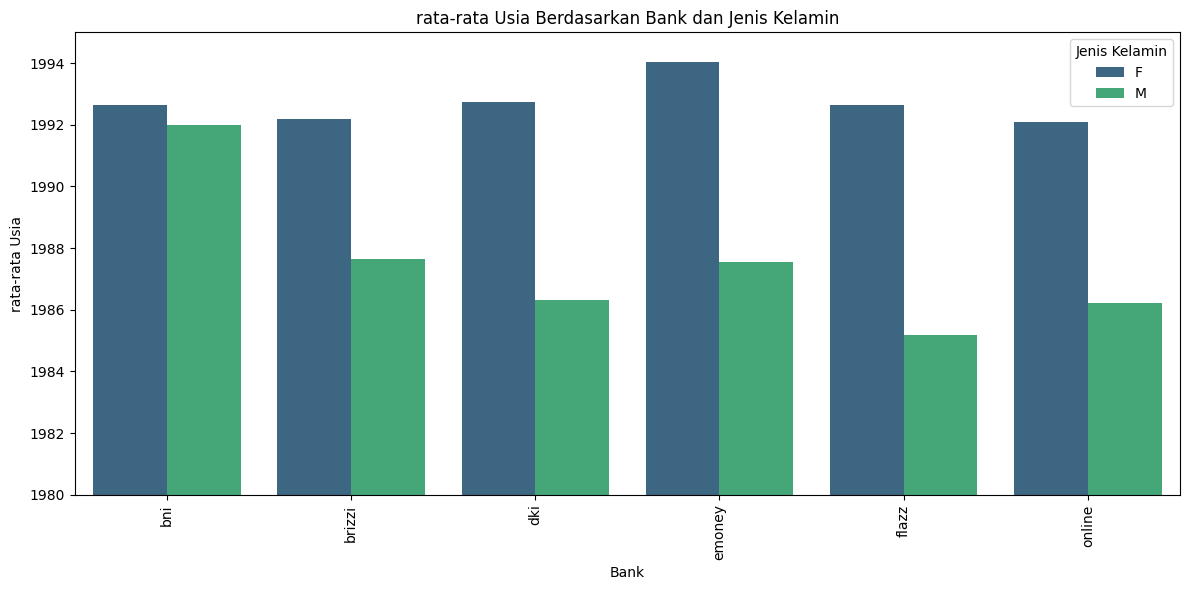

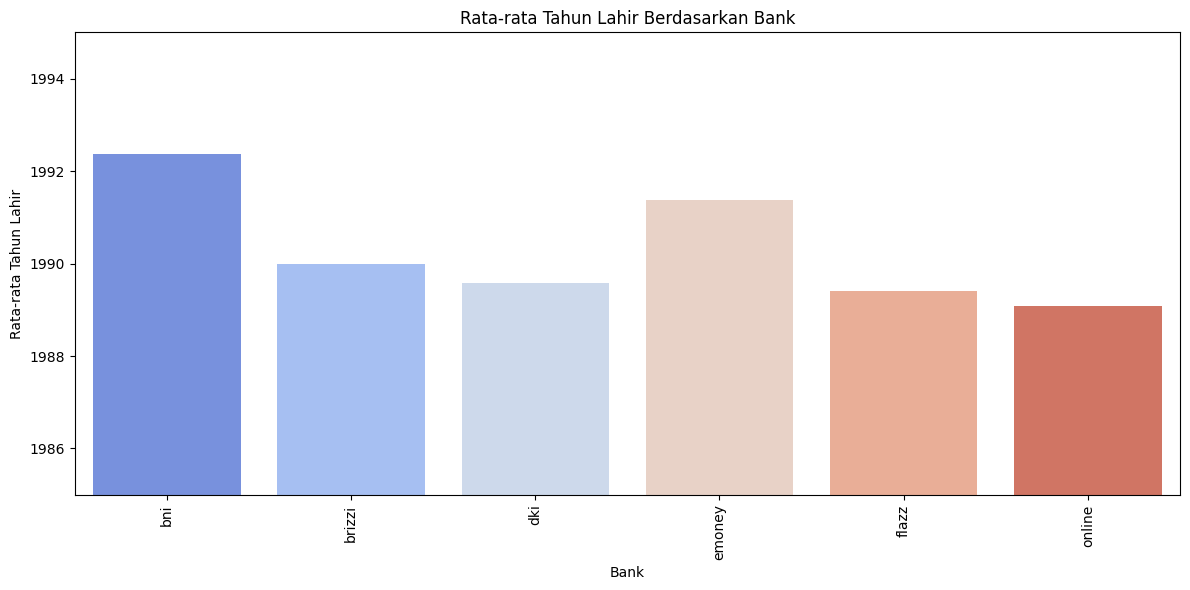

In [332]:
# Buat visualisasi
plt.figure(figsize=(12, 6))
sns.countplot(data=dfa, x='payCardBank', hue='payCardSex', order=dfa['payCardBank'].value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.title('Distribusi Sumber Dana Berdasarkan Jenis Kelamin')
plt.xlabel('Bank')
plt.ylabel('Jumlah Pengguna')
plt.legend(title='Jenis Kelamin')
plt.tight_layout()
plt.show()

# Visualisasi tambahan: Distribusi usia berdasarkan bank
min_y = int(dfa['payCardBirthDate'].min())
max_y = int(dfa['payCardBirthDate'].max())

plt.figure(figsize=(12, 20))
sns.boxplot(data=dfa, x='payCardBank', y='payCardBirthDate', hue='payCardSex', order=dfa['payCardBank'].value_counts().index)
plt.xticks(rotation=90)
plt.yticks(np.arange(min_y, max_y + 1, 1))
plt.title('Distribusi Usia Berdasarkan Sumber Dana dan Jenis Kelamin')
plt.xlabel('Bank')
plt.ylabel('Usia')
plt.legend(title='Jenis Kelamin')
plt.tight_layout()
plt.show()

# Visualisasi avg usia berdasarkan bank dan jenis kelamin
# Ensure 'Tahun Lahir' is numeric
avg_age['Tahun Lahir'] = pd.to_numeric(avg_age['Tahun Lahir'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_age, x='Bank', y='Tahun Lahir', hue='Jenis Kelamin', palette='viridis')
plt.ylim(1980,1995) # Atur range Y
plt.xticks(rotation=90)
plt.title('rata-rata Usia Berdasarkan Bank dan Jenis Kelamin')
plt.xlabel('Bank')
plt.ylabel('rata-rata Usia')
plt.legend(title='Jenis Kelamin')
plt.tight_layout()
plt.show()

# Visualisasi rata-rata usia berdasarkan bank
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_age_avg, x='Bank', y='Rata-rata Tahun Lahir', palette='coolwarm')
plt.ylim(1985,1995)  # Atur range Y
plt.xticks(rotation=90)
plt.title('Rata-rata Tahun Lahir Berdasarkan Bank')
plt.xlabel('Bank')
plt.ylabel('Rata-rata Tahun Lahir')
plt.tight_layout()
plt.show()

#### **Insight 1**
- Mayoritas pengguna layanan Transjakarta adalah **perempuan**, dengan metode pembayaran yang paling umum berasal dari **Bank DKI**.
- Berdasarkan usia, pengguna **perempuan** cenderung berada di rentang usia yang lebih **muda** dibandingkan pengguna laki-laki.
- **Laki-laki** lebih mendominasi penggunaan metode pembayaran **digital/online**, sedangkan perempuan cenderung lebih beragam dalam pilihan sumber dananya.
- Secara keseluruhan, mayoritas pengguna berada di usia **produktif (20–45 tahun)**, menunjukkan potensi besar untuk program **loyalitas** atau **promosi yang ditargetkan berdasarkan usia**.

---

Visualisasi dari pernyataan masalah 1 telah kita tuntaskan, mari kita lanjutkan dengan pernyataan masalah ke 2.

### Frekuensi Pengguna dalam Menggunakan Transjakarta

Pada subbab ini, saya akan fokus pada seberapa sering seseorang menggunakan moda transportasi Transjakarta dalam periode waktu tertentu (bulan April 2023). Untuk itu, saya akan memanfaatkan kolom `payCardName`, yang berisi nama-nama pelanggan yang menggunakan kartu untuk tap in dan tap out.

Sebelum melanjutkan ke visualisasi, saya akan terlebih dahulu melakukan tabulasi untuk menghitung jumlah kemunculan nama setiap pengguna secara unik. Dengan begitu, kita dapat melihat sebaran frekuensi pengguna secara keseluruhan, yang akan sangat membantu dalam memproses dan memastikan apakah visualisasi yang kita buat nanti sudah sesuai dengan harapan.

In [333]:
# Tabulasi jumlah sebaran nama yang muncul secara unik
name_frequency = dfa['payCardName'].value_counts().reset_index()
name_frequency.columns = ['Nama Pengguna', 'Frekuensi Penggunaan']
avg_freq_value = name_frequency['Frekuensi Penggunaan'].mean()
avg_freq = pd.DataFrame({'Frekuensi Penggunaan': ['Rata-rata'], 'Rata-rata Frekuensi': [avg_freq_value]})
least_name_freq = name_frequency[name_frequency['Frekuensi Penggunaan'] == name_frequency['Frekuensi Penggunaan'].min()]
least_name_freq = least_name_freq.rename(columns={'Nama Pengguna': 'Nama Pengguna', 'Frekuensi Penggunaan': 'Frekuensi Penggunaan'})
least_name_freq = least_name_freq.reset_index(drop=True)
# Menampilkan tabulasi
display(name_frequency, avg_freq, least_name_freq)

,Nama Pengguna,Frekuensi Penggunaan
0,Suci Wacana,80
1,Fathonah Saefullah,80
2,Suci Hutagalung,44
3,Cengkal Lestari,44
4,Rahayu Prabowo,44
...,...,...
1988,Nadine Waluyo,1
1989,Faizah Samosir,1
1990,Hardana Gunarto,1
1991,Ajimat Pradana,1


,Frekuensi Penggunaan,Rata-rata Frekuensi
0,Rata-rata,19.016558


,Nama Pengguna,Frekuensi Penggunaan
0,drg. Leo Najmudin,1
1,Queen Hidayat,1
2,Winda Winarno,1
3,Ifa Widiastuti,1
4,Jatmiko Mansur,1
...,...,...
294,Nadine Waluyo,1
295,Faizah Samosir,1
296,Hardana Gunarto,1
297,Ajimat Pradana,1


#### Visualisasi Frekuensi Penggunaan Nama Pengguna

Pada bagian ini, saya akan melakukan visualisasi untuk memahami seberapa sering masing-masing nama pengguna muncul dalam dataset. Tujuan dari analisis ini adalah untuk mengidentifikasi nama-nama yang paling sering digunakan serta menghitung rata-rata dan nama yang paling jarang muncul.

Visualisasi Top 20 Nama Berdasarkan Frekuensi Penggunaan untuk memberikan gambaran visual yang lebih jelas, saya membuat barplot yang menampilkan 20 nama pengguna teratas berdasarkan frekuensi penggunaannya. Visualisasi ini membantu mengidentifikasi nama-nama yang paling umum digunakan, serta pola distribusi pengguna secara keseluruhan. Visualisasi ini menggunakan seaborn dengan palet warna *viridis*, dan sumbu Y menampilkan nama pengguna agar lebih mudah dibaca secara vertikal.


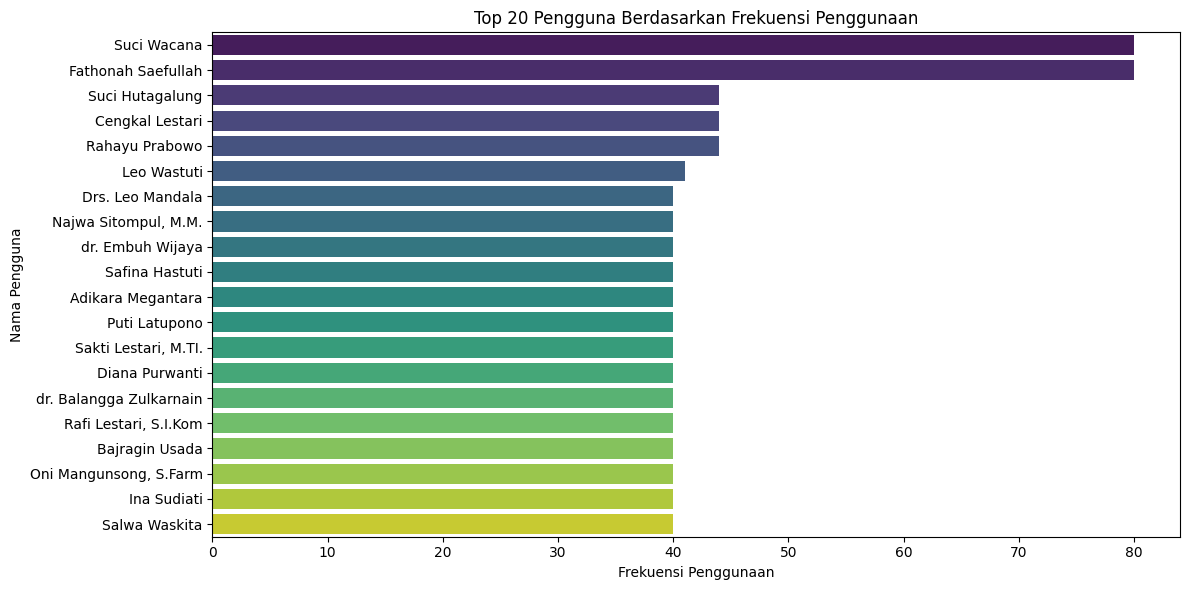

In [334]:
# Visualisasi Frekuensi Penggunaan
plt.figure(figsize=(12, 6))
top_users = name_frequency.head(20)  # Menampilkan 20 pengguna teratas
sns.barplot(data=top_users, x='Frekuensi Penggunaan', y='Nama Pengguna', palette='viridis')
plt.title('Top 20 Pengguna Berdasarkan Frekuensi Penggunaan')
plt.xlabel('Frekuensi Penggunaan')
plt.ylabel('Nama Pengguna')
plt.tight_layout()
plt.show()

#### **Insight 2**
- Pengguna dengan frekuensi tertinggi adalah **Suci Wacana** dan **Fathonah Saefullah**, masing-masing melakukan **80 kali perjalanan dalam 1 bulan**.
- Rata-rata frekuensi perjalanan pengguna adalah **19 kali per bulan**, menandakan adanya keterikatan moderat terhadap layanan.
- Sebanyak **299 pengguna** hanya melakukan **1 kali perjalanan dalam sebulan**, yang bisa dikategorikan sebagai pengguna **berisiko churn** atau pengguna **tidak loyal**.

---

Setelah memvisualisasikan frekuensi penggunaan, kini saatnya kita berfokus pada analisis rute populer dan jam sibuk.

### Rute Populer dan Jam Sibuk

 Dalam subbab ini, kita akan memulai dengan mengidentifikasi rute-rute yang paling sering dilalui oleh pengguna dan kemudian menganalisis jam sibuk berdasarkan data waktu pengguna melakukan tap in dan tap out.

**1. Rute Populer**  
Langkah pertama adalah memetakan rute yang paling sering digunakan. Kita akan menganalisis frekuensi penggunaan rute dengan merujuk pada kolom `tapInStop` dan `corridorName`. Hasil dari analisis ini akan menunjukkan rute mana yang paling banyak digunakan oleh pengguna Transjakarta selama periode April 2023. Dengan demikian, kita dapat mengetahui rute-rute yang paling ramai dan mengidentifikasikan kebutuhan untuk meningkatkan kapasitas di rute tersebut jika diperlukan.

**2. Jam Sibuk**  
Setelah memetakan rute populer, kita akan menganalisis waktu-waktu sibuk yang tercermin dalam data pengguna. Untuk itu, kita akan memanfaatkan kolom `tapInDate`, `tapInClocks`, `tapOutDate`, dan `tapOutClocks`. Dengan mengonversi tanggal menjadi nama hari, serta menganalisis jam pengguna melakukan tap in dan tap out, kita dapat mengidentifikasi pola perjalanan pengguna. Ini akan memberi gambaran tentang kapan jam-jam sibuk terjadi selama sehari dalam seminggu.

**3. Visualisasi Rute Populer**  
Setelah tabulasi data, visualisasi akan digunakan untuk menggambarkan rute paling populer. Visualisasi ini membantu menggambarkan dengan jelas distribusi frekuensi rute yang sering dilalui oleh pengguna dalam periode waktu yang ditentukan. Ini juga memberi tahu kita tentang rute-rute yang perlu mendapatkan perhatian lebih dalam hal pengelolaan atau penambahan fasilitas.

**4. Visualisasi Jam Sibuk**  
Selain rute populer, kita juga akan memvisualisasikan pola jam sibuk. Visualisasi ini akan menunjukkan seberapa banyak pengguna yang melakukan perjalanan pada jam tertentu, berdasarkan hari dan jam perjalanan mereka. Dengan menggunakan heatmap, kita akan dapat melihat waktu-waktu puncak dalam perjalanan serta hari-hari dengan frekuensi perjalanan yang tinggi. Ini sangat penting dalam perencanaan layanan dan penjadwalan armada.

In [335]:
# Fungsi untuk mengubah nama hari ke dalam bahasa Indonesia
def translate_day_to_indonesian(day):
    days_translation = {'Monday': 'Senin','Tuesday': 'Selasa','Wednesday': 'Rabu','Thursday': 'Kamis','Friday': 'Jumat','Saturday': 'Sabtu','Sunday': 'Minggu'
    }
    return days_translation.get(day, day)

# Referensi urutan hari dalam bahasa Indonesia
urutan_hari = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# Tabulasi rute populer berdasarkan tapInStops dan corridorName, hapus value `tidak ada data`
dfa_corridorName = dfa[dfa['corridorName'] != 'tidak ada data']
routes = dfa_corridorName.groupby(['corridorName']).size().reset_index(name='Frekuensi')
routes.columns = ['Korridor', 'Frekuensi']
popular_routes = routes.sort_values(by='Frekuensi', ascending=False).head(10)

# Tabulasi jam sibuk berdasarkan tapInHour
dfa['tapInHour'] = pd.to_datetime(dfa['tapInClocks'], errors='coerce').dt.hour
busy_hours_clocks = dfa['tapInHour'].value_counts().reset_index()
busy_hours_clocks.columns = ['Jam', 'Frekuensi']
busy_hours_clocks = busy_hours_clocks.sort_values(by='Jam')

# Tabulasi hari sibuk berdasarkan tapInDay
dfa['tapInDay'] = pd.to_datetime(dfa['tapInDate'], errors='coerce').dt.day_name().apply(translate_day_to_indonesian)
busy_days = dfa['tapInDay'].value_counts().reset_index()
busy_days.columns = ['Hari', 'Frekuensi']
busy_days['Hari'] = pd.Categorical(busy_days['Hari'], categories=urutan_hari, ordered=True)
busy_days = busy_days.sort_values('Hari')

# Menampilkan hasil tabulasi
display(popular_routes, busy_hours_clocks, busy_days)

,Korridor,Frekuensi
20,cibubur - balai kota,400
33,ciputat - csw,388
116,pulo gadung - monas,349
47,harmoni - jakarta international stadium,342
77,kebayoran lama - tanah abang,339
55,kalideres - bundaran hi via veteran,336
73,kampung rambutan - pondok gede,333
157,rusun pondok bambu - walikota jakarta timur,332
159,rusun rawa bebek - kodamar,318
98,pasar minggu - tanah abang,313


,Jam,Frekuensi
3,5,3358
0,6,5839
5,7,2812
4,8,2880
6,9,2807
15,10,299
13,11,339
14,12,337
12,13,348
16,14,181


,Hari,Frekuensi
2,Senin,6838
3,Selasa,6835
1,Rabu,6840
4,Kamis,6834
0,Jumat,6851
6,Sabtu,1830
5,Minggu,1872


#### Visualisasi Rute Populer, Jam Sibuk, dan Hari Sibuk

Pada bagian ini, saya akan menampilkan tiga jenis visualisasi yang bertujuan untuk memberikan insight mengenai perilaku pengguna berdasarkan rute yang sering digunakan, waktu tersibuk, dan hari tersibuk. Analisis ini penting untuk memahami pola penggunaan layanan transportasi secara lebih menyeluruh.

1. **Visualisasi Rute Populer**  
   Visualisasi pertama menampilkan 10 koridor paling populer berdasarkan frekuensi penggunaannya. Dengan menggunakan barplot horizontal, saya dapat melihat dengan jelas koridor mana saja yang paling sering dilalui oleh pengguna. Warna palet *viridis* digunakan untuk memberikan nuansa visual yang menarik dan mudah dibedakan antar koridor.

2. **Visualisasi Jam Sibuk**  
   Selanjutnya, saya membuat visualisasi untuk melihat distribusi frekuensi berdasarkan jam. Barplot ini menunjukkan jam-jam sibuk dalam sehari ketika jumlah pengguna paling tinggi. Dengan palet *coolwarm*, saya ingin mempermudah identifikasi jam dengan kepadatan tinggi dan rendah secara visual.

3. **Visualisasi Hari Sibuk**  
   Visualisasi terakhir menunjukkan distribusi frekuensi pengguna berdasarkan hari dalam seminggu. Dengan palet *magma*, grafik ini menyampaikan informasi tentang hari-hari dengan aktivitas pengguna tertinggi. Hal ini sangat berguna untuk pengambilan keputusan operasional seperti penambahan armada atau pengaturan jadwal pada hari-hari tertentu.


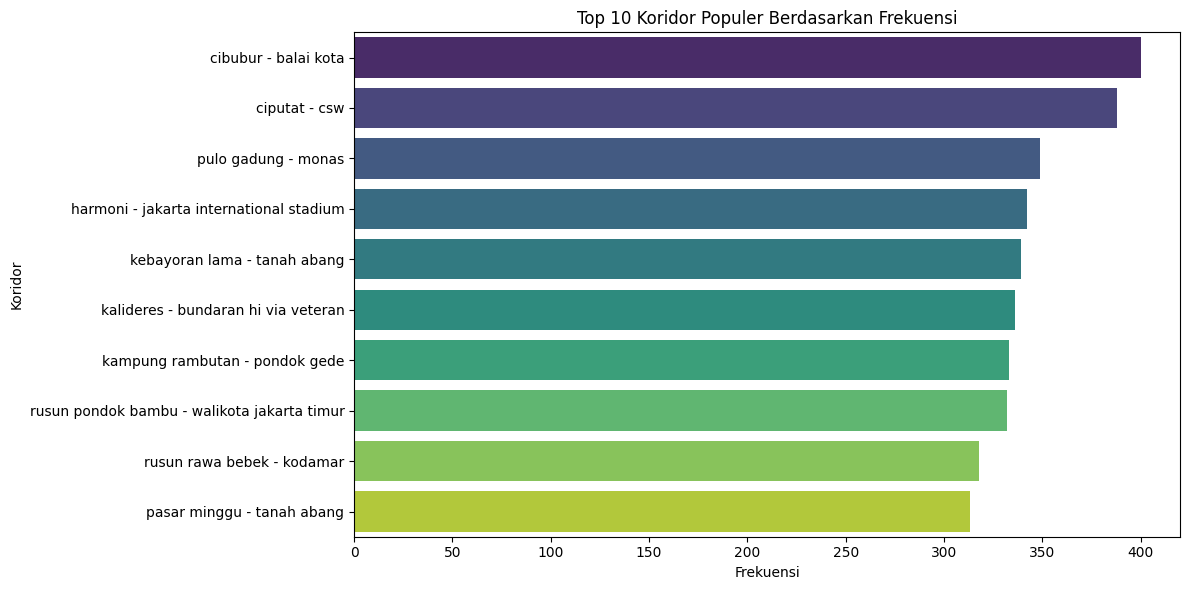

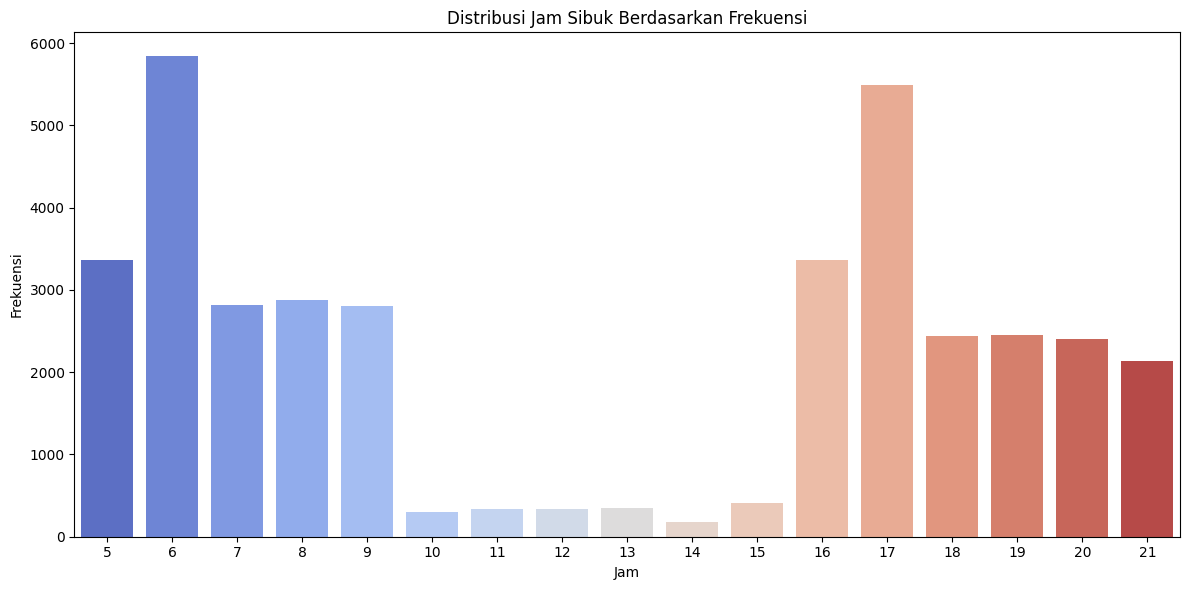

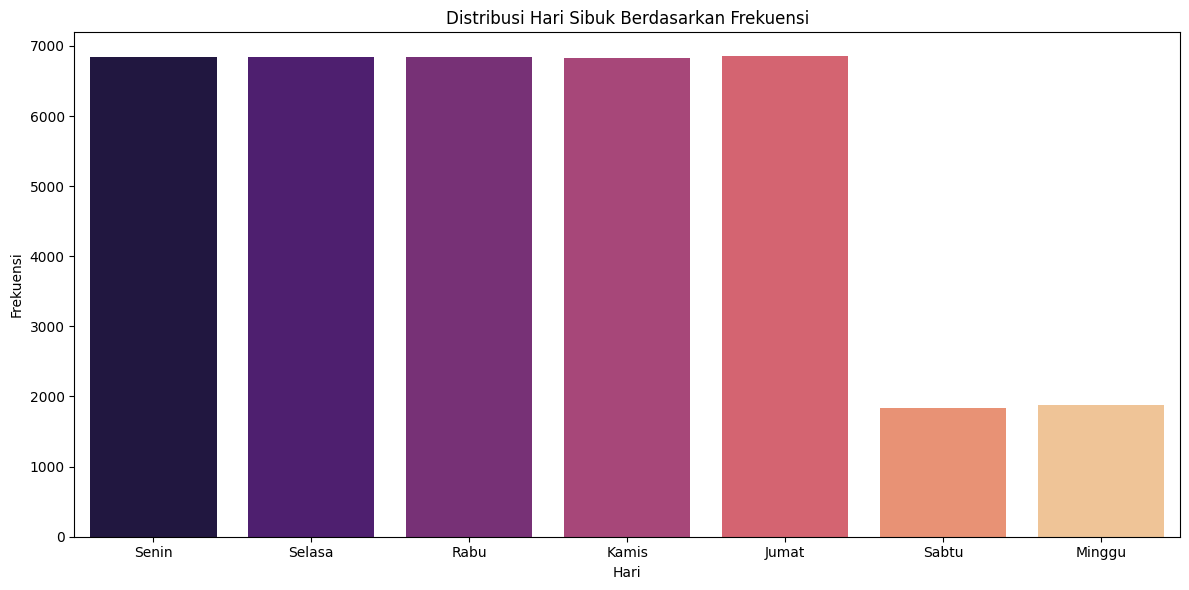

In [336]:
# Visualisasi rute populer
plt.figure(figsize=(12, 6))
sns.barplot(data=popular_routes, x='Frekuensi', y='Korridor', palette='viridis', ci=None)
plt.title('Top 10 Koridor Populer Berdasarkan Frekuensi')
plt.xlabel('Frekuensi')
plt.ylabel('Koridor')
plt.tight_layout()
plt.show()

# Visualisasi jam sibuk
plt.figure(figsize=(12, 6))
sns.barplot(data=busy_hours_clocks, x='Jam', y='Frekuensi', palette='coolwarm')
plt.title('Distribusi Jam Sibuk Berdasarkan Frekuensi')
plt.xlabel('Jam')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# Visualisasi hari sibuk
plt.figure(figsize=(12, 6))
sns.barplot(data=busy_days, x='Hari', y='Frekuensi', palette='magma')
plt.title('Distribusi Hari Sibuk Berdasarkan Frekuensi')
plt.xlabel('Hari')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

#### **Insight 3**
- **Rute paling populer**:
  - *Cibubur - Balai Kota*
  - *Ciputat - CSW*
- **Jam sibuk (peak hours)** terjadi pada:
  - **Pukul 06.00 dan 17.00 WIB** *(jam berangkat dan pulang kerja/sekolah)*
  - Diikuti oleh **05.00 dan 16.00 WIB**
- Tingkat kepadatan tertinggi terjadi pada **hari kerja (Senin–Jumat)**, menunjukkan bahwa mayoritas pengguna merupakan **pekerja dan pelajar**.

---

# ****Analisis Lanjutan****

Berdasarkan ketiga insight yang telah diuraikan—mengenai profil demografis pengguna, frekuensi penggunaan individu, serta pola perjalanan—dapat ditarik benang merah terkait **peluang dan tantangan dalam strategi peningkatan layanan dan promosi Transjakarta**.

Ketiga temuan tersebut menunjukkan bahwa keputusan berbasis data sangat diperlukan untuk memahami karakteristik pengguna, mengidentifikasi perilaku perjalanan, serta menentukan waktu dan lokasi yang tepat untuk intervensi promosi maupun peningkatan armada.

Dengan mempertimbangkan keseluruhan temuan tersebut, berikut ini disajikan kesimpulan utama yang dapat menjadi dasar pengambilan keputusan oleh manajemen.

# ****Kesimpulan & Saran****

Berdasarkan hasil analisis data pengguna Transjakarta selama periode 3–30 April 2023 (sebanyak 37.900 transaksi), diperoleh sejumlah temuan penting yang dapat dijadikan acuan dalam strategi promosi dan peningkatan kualitas layanan:

1. **Segmentasi pengguna** menunjukkan dominasi usia produktif, dengan **perempuan** sebagai pengguna terbanyak dan **Bank DKI** sebagai metode pembayaran paling umum. Ini menunjukkan adanya potensi kolaborasi strategis dengan penyedia sumber dana, khususnya Bank DKI, untuk program promosi yang menyasar segmen usia produktif dan perempuan.

2. Dari segi **frekuensi penggunaan**, sebagian kecil pengguna memiliki tingkat loyalitas tinggi (frekuensi > 80 kali/bulan), namun terdapat lebih dari 290 pengguna yang hanya memakai layanan sekali dalam sebulan. Ini membuka peluang untuk melakukan pendekatan retensi terhadap pengguna yang jarang menggunakan layanan, misalnya melalui promosi atau loyalty program.

3. **Rute dan waktu padat** terkonsentrasi pada rute-rute utama seperti *Cibubur - Balai Kota* dan *Ciputat - CSW*, serta pada jam-jam sibuk pukul **06.00 dan 17.00 WIB** di hari kerja. Hal ini dapat dijadikan dasar untuk:
   - Menambah armada atau memperkuat pelayanan di jam sibuk.
   - Menyasar halte-halte sepi dengan insentif atau promosi untuk meningkatkan distribusi pengguna.

Secara keseluruhan, analisis ini menunjukkan bahwa pendekatan berbasis data dapat digunakan untuk meningkatkan kualitas pelayanan dan memperluas basis pengguna Transjakarta dengan strategi yang tersegmentasi dan efisien.


# ****Dashboard Interaktif: Visualisasi Sumber Dana Pengguna, Rute Populer, dan Jam Sibuk Transjakarta****

Saya telah menyusun sebuah dashboard interaktif menggunakan Tableau untuk memvisualisasikan data pengguna Transjakarta berdasarkan rute populer dan waktu tersibuk.

Dashboard ini menampilkan beberapa insight utama, seperti:
- **Top 10 Rute Transjakarta** berdasarkan frekuensi penggunaan
- **Distribusi Jam Sibuk** pengguna
- **Distribusi Hari Sibuk** berdasarkan aktivitas tap in

Klik link di bawah ini untuk melihat visualisasi interaktifnya secara langsung:

👉 [**Lihat Dashboard di Tableau Public**](https://public.tableau.com/app/profile/faisal.tegar.febrian/viz/FaisalTegarFebrian_Capstone2/RutePopulerdanJamSibuk?publish=yes)

> *Catatan: Dashboard ini lebih optimal jika dibuka melalui perangkat desktop untuk pengalaman interaktif yang lebih maksimal.*

---

🛠️ *Dibuat oleh: Faisal Tegar Febrian*  
📁 *Capstone Project Modul 2 — Data Science Bootcamp*
